# Persiapan dan Analisis Data

### Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import optuna

c:\Users\hadik\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1KhHuJrSxyE_tnXKCR2QXqwvdGsCC-ur2/export?format=csv')

In [3]:
df.head()

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,17.395776,18.057278,4.548844,40.818315,42.747400,15.235375,2.080558,2.117612,4.194824,2.786645,2.922868,18.932746,11.312396,11.302187,10.864530,1
1,17.048930,17.143965,4.285857,41.389466,42.116279,14.243516,2.185737,2.233318,4.195780,3.243245,3.436646,19.700106,11.256998,11.242310,10.867538,1
2,19.957301,16.498584,5.082156,48.724795,40.816921,15.203335,2.169338,2.245723,3.863509,3.069086,3.474671,17.313374,11.242156,11.228013,11.041794,1
3,19.713066,18.029258,4.707696,47.484912,43.629222,14.230307,2.135099,2.147982,3.987222,2.920590,2.926331,18.956953,11.266421,11.260806,11.034323,1
4,17.383914,14.581238,4.632718,46.006665,38.900382,14.446719,2.417031,2.458251,3.903999,4.259136,4.460186,17.438845,11.103429,11.094264,10.944285,1


In [4]:
df.drop(['Class'],axis=1,inplace=True)

In [5]:
df.shape[0]

5656

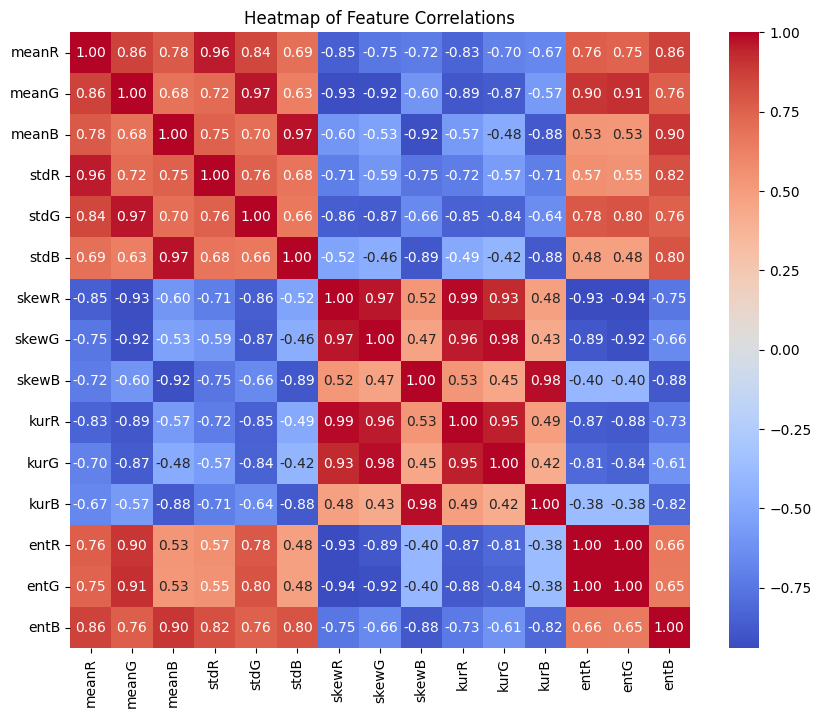

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Feature Correlations")
plt.show()

### Informasi Statistik Dasar

In [7]:
statistika_deskriptif = pd.DataFrame({
    'Mean': df.mean(),
    'Standard Deviation': df.std(),
    'Minimum': df.min(),
    'Maximum': df.max(),
    'Range': df.max() - df.min(),
    'Q1': df.quantile(0.25),
    'Median': df.quantile(0.5),
    'Q3': df.quantile(0.75),
})

display(statistika_deskriptif)

,Mean,Standard Deviation,Minimum,Maximum,Range,Q1,Median,Q3
meanR,20.894382,5.260718,6.854176,46.994451,40.140274,17.015386,20.055104,23.933250
meanG,18.023509,3.885058,6.259336,37.866338,31.607002,15.462487,17.823574,20.508286
meanB,5.562521,1.572465,1.823841,14.023399,12.199558,4.469088,5.206807,6.298417
stdR,49.518673,9.091646,23.889681,78.573397,54.683716,42.518804,48.737837,55.533851
stdG,43.181128,5.799811,21.816707,63.912439,42.095732,39.565446,43.274979,47.258675
stdB,16.216090,2.737406,7.831019,29.260652,21.429632,14.261454,15.830328,17.684630
skewR,2.164332,0.298941,1.154889,3.582313,2.427425,1.962475,2.147151,2.337118
skewG,2.232326,0.340901,1.203163,3.997579,2.794416,2.003130,2.188874,2.405244
skewB,3.745612,0.647198,1.944842,7.961952,6.017110,3.304125,3.764237,4.170742
kurR,3.208423,1.533598,-0.531692,12.941081,13.472773,2.161075,3.023438,3.989808


### Missing Value

In [8]:
df.isna().sum()

meanR    0
meanG    0
meanB    0
stdR     0
stdG     0
stdB     0
skewR    0
skewG    0
skewB    0
kurR     0
kurG     0
kurB     0
entR     0
entG     0
entB     0
dtype: int64

### Distribusi Data

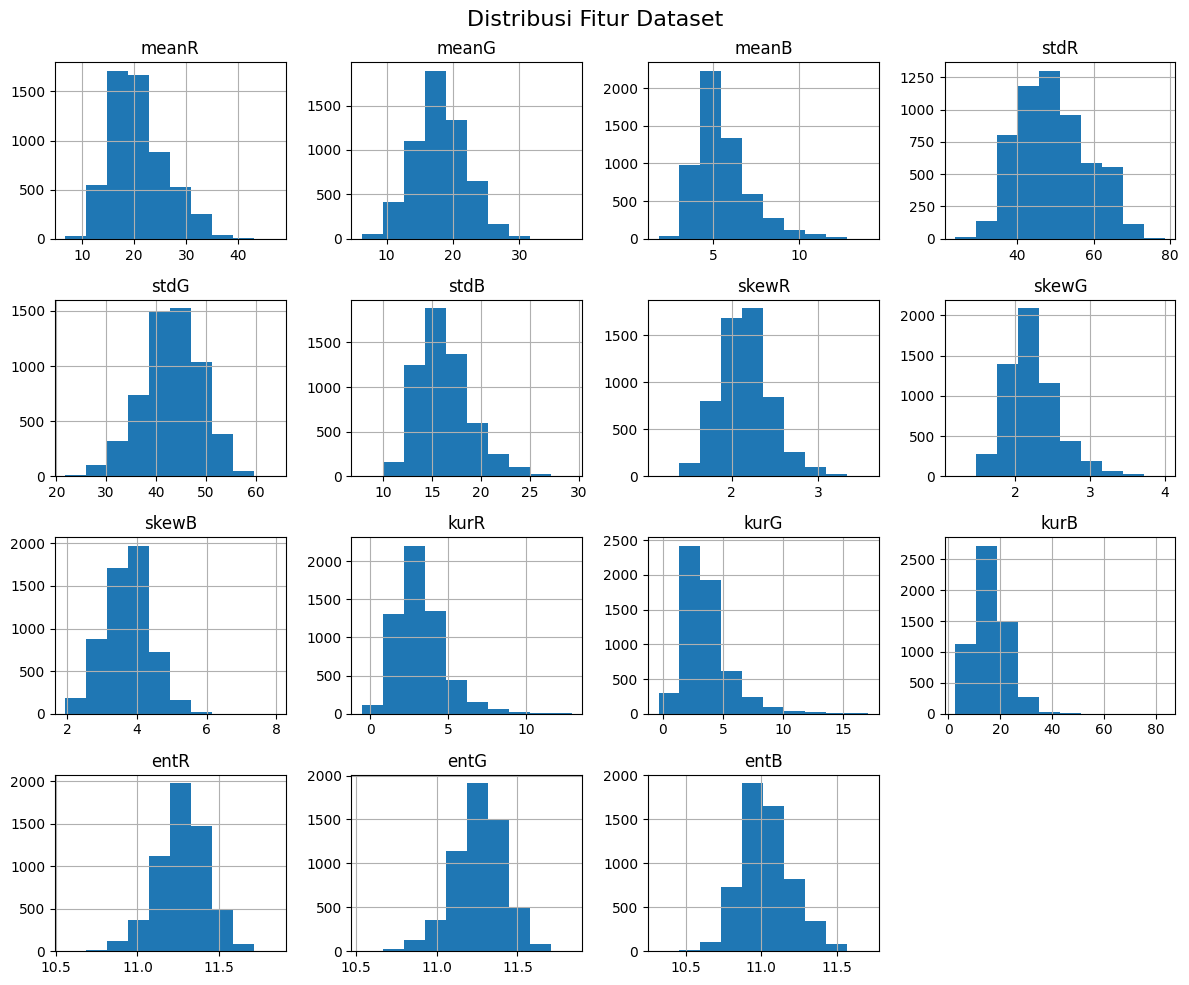

In [9]:


df.hist(figsize=(12, 10))
plt.suptitle('Distribusi Fitur Dataset', fontsize=16)
plt.tight_layout()
plt.show()

### Mengidentifikasi Outlier

In [10]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for column in df.columns:
    outliers = find_outliers_iqr(df, column)
    outliers_sum = outliers.shape[0]
    if outliers.shape[0] > 0:
        print(f"Outliers in {column}: {outliers_sum}")

Outliers in meanR: 65
Outliers in meanG: 50
Outliers in meanB: 211
Outliers in stdR: 3
Outliers in stdG: 41
Outliers in stdB: 143
Outliers in skewR: 109
Outliers in skewG: 170
Outliers in skewB: 34
Outliers in kurR: 170
Outliers in kurG: 288
Outliers in kurB: 87
Outliers in entR: 99
Outliers in entG: 87
Outliers in entB: 74


In [11]:
def find_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > threshold]
    return outliers

for column in df.columns:
    outliers = find_outliers_zscore(df, column)
    outliers_sum = outliers.shape[0]
    if outliers_sum > 0:
        print(f"Outliers in {column}: {outliers_sum}")

Outliers in meanR: 17
Outliers in meanG: 16
Outliers in meanB: 94
Outliers in stdR: 1
Outliers in stdG: 13
Outliers in stdB: 54
Outliers in skewR: 45
Outliers in skewG: 63
Outliers in skewB: 20
Outliers in kurR: 72
Outliers in kurG: 97
Outliers in kurB: 40
Outliers in entR: 27
Outliers in entG: 27
Outliers in entB: 23


# Preprocessing Data

### Standarisasi Z-Score

In [12]:
zscore = StandardScaler()
df_zscore = zscore.fit_transform(df)
df = pd.DataFrame(df_zscore, columns=df.columns)

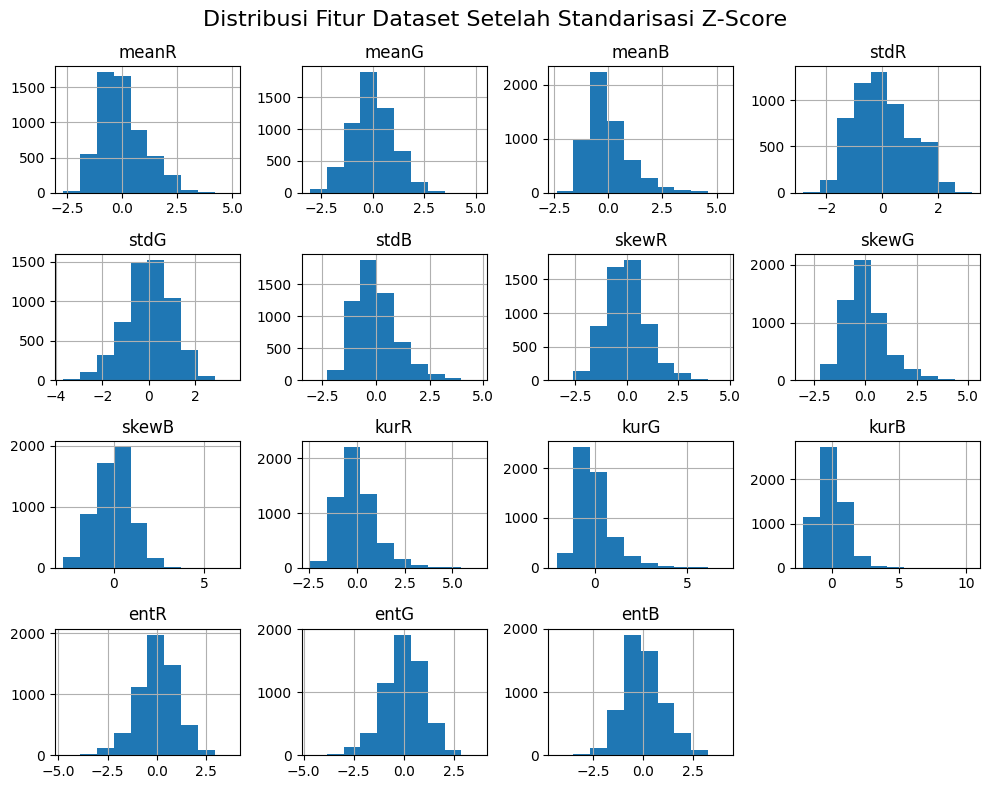

In [13]:
df.hist(figsize=(10, 8))
plt.suptitle('Distribusi Fitur Dataset Setelah Standarisasi Z-Score', fontsize=16)
plt.tight_layout()
plt.show()

### PCA

In [14]:
pca = PCA()
X_pca = pca.fit_transform(df)

num_components = 2

pca_reduced = PCA(n_components=num_components)
X_reduced = pca_reduced.fit_transform(df)

columns = [f'PC{i+1}' for i in range(num_components)]
df = pd.DataFrame(X_reduced, columns=columns)

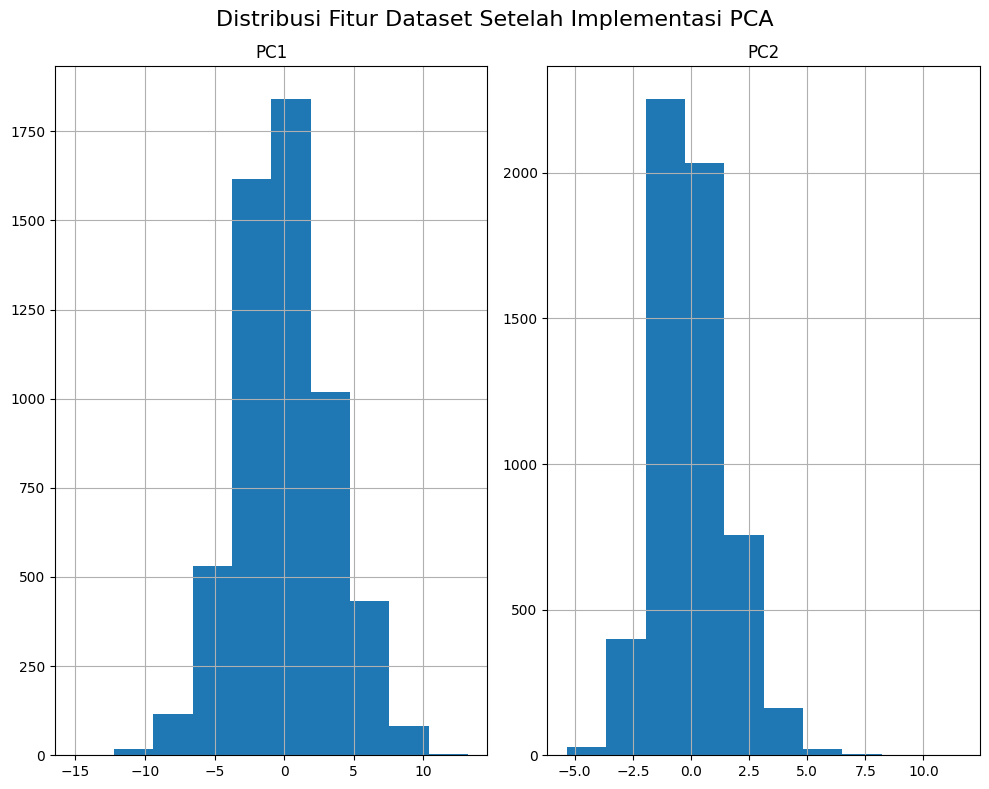

In [15]:
df.hist(figsize=(10, 8))
plt.suptitle('Distribusi Fitur Dataset Setelah Implementasi PCA', fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
df.head()

,PC1,PC2
0,-0.738357,1.602585
1,-1.514797,1.284781
2,-0.600808,0.217052
3,-0.350192,1.006064
4,-2.549994,-0.572403


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     5656 non-null   float64
 1   PC2     5656 non-null   float64
dtypes: float64(2)
memory usage: 88.5 KB


### Normalisasi MinMax

In [18]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

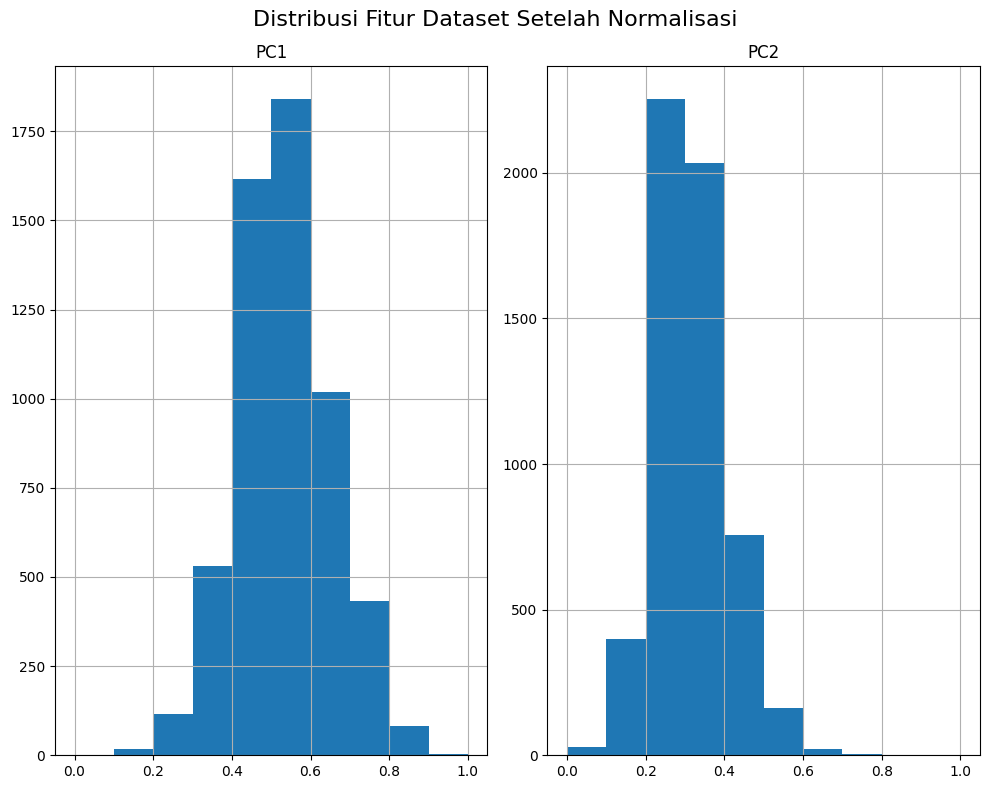

In [19]:
df.hist(figsize=(10, 8))
plt.suptitle('Distribusi Fitur Dataset Setelah Normalisasi', fontsize=16)
plt.tight_layout()
plt.show()

# Model

In [20]:
def SOM(train, w, cluster, R, max_epoch, lr, R_change, lr_change):
  closest_neighbors = []
  w_out = []

  for i in range(max_epoch):
    for j in range(len(train)):
      data = train[j]

      d = [np.linalg.norm(data - w[k]) for k in range(len(w))]
      d = np.argsort(d)
      if i == max_epoch-1:
        closest_neighbors.append(d[0])
      
      w_to_update = d[:R + 1]

      for l in w_to_update :
        dw = lr * (data - w[l])
        w[l] += dw
        
      w_out.append(np.copy(w))
      
    lr *= lr_change
    
    if (i + 1) % R_change == 0:
      R = max(0, R - 1)

  return w, closest_neighbors, w_out

# Calculating Error

In [21]:
def silhouette_score_som(train, w, closest_neighbors):
    labels = closest_neighbors   
    if len(np.unique(labels)) < 2:
        return -1
    score = silhouette_score(train, labels, metric='euclidean')
    return score

def quantization_error(train, w, closest_neighbors):
  total_error = 0
  for i, data in enumerate(train):
    bmu = w[closest_neighbors[i]]
    total_error += np.linalg.norm(data - bmu)
  return total_error / len(train)

def topographic_error(train, w, closest_neighbors):
  error_count = 0
  for i, data in enumerate(train):
    distances = [np.linalg.norm(data - weight) for weight in w]

    sorted_indices = np.argsort(distances)
    closest_neighbors = sorted_indices[0]
    second_closest_neighbors = sorted_indices[1]

    if abs(closest_neighbors - second_closest_neighbors) > 1:
      error_count += 1

  return error_count / len(train)


def count_error(train, w, closest_neighbors):
  qe = quantization_error(train, w, closest_neighbors)
  te = topographic_error(train, w, closest_neighbors)
  ss = silhouette_score_som(train, w, closest_neighbors)
  return qe, te, ss

# Tuning Hyperparameter

## Tuning Manual

In [22]:
size = df.shape[1]
te_qe_ss_manual_plot = []

def generate_random_parameters(size):
  cluster = np.random.randint(2, 10)
  w = np.random.rand(cluster, size)
  R = np.random.randint(0, cluster)
  lr = np.random.uniform(1e-10, 0.1)
  max_epoch = np.random.randint(10, 100)
  R_change = np.random.randint(1, max_epoch)
  lr_change = np.random.uniform(0.1, 0.9)

  return cluster, w, R, lr, R_change, max_epoch, lr_change

def tuning(iter):
  used_parameters = set()
  best_parameter = []
  best_error = [1e1000,0,0,0]

  for i in range(iter):
    while True:
      cluster, w, R, lr, R_change, max_epoch, lr_change = generate_random_parameters(size)

      param_tuple = (cluster, w.tobytes(), R, lr, R_change, max_epoch, lr_change)

      if param_tuple not in used_parameters:
        used_parameters.add(param_tuple)
        break

    tuning_data = df.to_numpy()
    print(f'Tuning {i}, cluster : {cluster}, R : {R}, lr : {lr}, lr change : {lr_change}, R change : {R_change}, max epoch : {max_epoch}')
    w, closest_neighbors, w_out = SOM(tuning_data, w, cluster=cluster, R=R, lr = lr, max_epoch=max_epoch, R_change=R_change, lr_change=lr_change)

    qe, te, ss = count_error(tuning_data, w, closest_neighbors)
    print(f'qe : {qe}, te : {te}, ss : {ss}')

    if qe+te-ss < best_error[0]:
      best_error[0] = qe+te
      best_error[1] = qe
      best_error[2] = te
      best_error[3] = ss
      best_parameter = [i, cluster, w, R, lr, R_change, max_epoch, lr_change]
      
    te_qe_ss_manual_plot.append((te,qe,ss))
    
    print(f'best parameter is tuning {best_parameter[0]}, with error qe : {best_error[1]}, te : {best_error[2]}, and ss : {best_error[3]}\n')
  return best_parameter

best_parameter_manual = tuning(100)

Tuning 0, cluster : 9, R : 4, lr : 0.09240334797268188, lr change : 0.29378091346132273, R change : 18, max epoch : 31
qe : 0.09201090977011435, te : 0.4766619519094767, ss : 0.11574440698719467
best parameter is tuning 0, with error qe : 0.09201090977011435, te : 0.4766619519094767, and ss : 0.11574440698719467

Tuning 1, cluster : 7, R : 6, lr : 0.08417188630829733, lr change : 0.4986928033735011, R change : 13, max epoch : 16
qe : 0.12586439795451765, te : 0.5657708628005658, ss : -0.08162930522406862
best parameter is tuning 0, with error qe : 0.09201090977011435, te : 0.4766619519094767, and ss : 0.11574440698719467

Tuning 2, cluster : 4, R : 0, lr : 0.088653362604435, lr change : 0.8158181023232504, R change : 30, max epoch : 55
qe : 0.08226656108274406, te : 0.5473833097595474, ss : 0.36860086775359574
best parameter is tuning 2, with error qe : 0.08226656108274406, te : 0.5473833097595474, and ss : 0.36860086775359574

Tuning 3, cluster : 6, R : 0, lr : 0.06926838173930232, lr

## Tuning dengan OPTUNA

In [33]:
size = df.shape[1]
te_qe_ss_optuna_plot = []

def tuning(trial):
    
    cluster = trial.suggest_int("cluster", 2, 10)
    R = trial.suggest_int("R", 0, cluster - 1)
    lr = trial.suggest_float("lr", 1e-10, 0.1, log=True)
    max_epoch = trial.suggest_int("max_epoch", 10, 100)
    R_change = trial.suggest_int("R_change", 1, max_epoch)
    lr_change = trial.suggest_float("lr_change", 0.1, 0.9)
    w = np.array([[trial.suggest_float(f"w{i}{j}", 0.0, 1.0) for j in range(size)]for i in range(cluster)]) 

    tuning_data = df.to_numpy()
    print(f'Trial {trial.number}, cluster : {cluster}, R : {R}, lr : {lr}, lr change : {lr_change}, R change : {R_change}, max epoch : {max_epoch}')
    
    w, closest_neighbors, w_out = SOM(tuning_data, w, cluster=cluster, R=R, lr=lr, max_epoch=max_epoch, R_change=R_change, lr_change=lr_change)

    qe, te, ss = count_error(tuning_data, w, closest_neighbors)
    print(f'qe : {qe}, te : {te}, ss : {ss}')

    total_error = qe + te
    te_qe_ss_optuna_plot.append((te, qe, ss))
    return total_error - ss

study = optuna.create_study(direction="minimize") 
study.optimize(tuning, n_trials=100)

[I 2024-11-21 11:44:22,288] A new study created in memory with name: no-name-5c640049-eb91-4d1a-803d-073a9751eef7


Trial 0, cluster : 5, R : 0, lr : 1.4826032426341976e-08, lr change : 0.2538898542780695, R change : 14, max epoch : 19


[I 2024-11-21 11:44:24,576] Trial 0 finished with value: 1.2357249903702603 and parameters: {'cluster': 5, 'R': 0, 'lr': 1.4826032426341976e-08, 'max_epoch': 19, 'R_change': 14, 'lr_change': 0.2538898542780695, 'w00': 0.6272320856178509, 'w01': 0.9110513843982903, 'w10': 0.9542621186811486, 'w11': 0.9797879629766407, 'w20': 0.7354392438683361, 'w21': 0.9823523739354096, 'w30': 0.7085963260333796, 'w31': 0.9966377805362842, 'w40': 0.9100364263208606, 'w41': 0.8845780209288691}. Best is trial 0 with value: 1.2357249903702603.


qe : 0.6122472233354562, te : 1.0, ss : 0.37652223296519605
Trial 1, cluster : 5, R : 4, lr : 8.09100733262239e-07, lr change : 0.6755901149528365, R change : 25, max epoch : 39


[I 2024-11-21 11:44:30,052] Trial 1 finished with value: 0.08190635575222427 and parameters: {'cluster': 5, 'R': 4, 'lr': 8.09100733262239e-07, 'max_epoch': 39, 'R_change': 25, 'lr_change': 0.6755901149528365, 'w00': 0.9934771117445151, 'w01': 0.4647247917450432, 'w10': 0.048354912089455526, 'w11': 0.2495767627838722, 'w20': 0.637893737269073, 'w21': 0.2777153340726629, 'w30': 0.970679605357686, 'w31': 0.21321494775545802, 'w40': 0.06301997566405537, 'w41': 0.7459452284131861}. Best is trial 1 with value: 0.08190635575222427.


qe : 0.15542674628856393, te : 0.15558698727015557, ss : 0.22910737780649526
Trial 2, cluster : 4, R : 2, lr : 0.0026669111546814713, lr change : 0.4685005338191758, R change : 1, max epoch : 60


[I 2024-11-21 11:44:35,471] Trial 2 finished with value: 0.170113349544732 and parameters: {'cluster': 4, 'R': 2, 'lr': 0.0026669111546814713, 'max_epoch': 60, 'R_change': 1, 'lr_change': 0.4685005338191758, 'w00': 0.6438230368188288, 'w01': 0.4752438095854967, 'w10': 0.7777389712658043, 'w11': 0.7686847434420899, 'w20': 0.9340316326312748, 'w21': 0.8499113399128821, 'w30': 0.5387081068065719, 'w31': 0.45695616927163096}. Best is trial 1 with value: 0.08190635575222427.


qe : 0.08291217913152028, te : 0.4504950495049505, ss : 0.3632938790917388
Trial 3, cluster : 9, R : 1, lr : 0.0005716868292989836, lr change : 0.5292238975083219, R change : 15, max epoch : 20


[I 2024-11-21 11:44:38,772] Trial 3 finished with value: 0.8372955294557956 and parameters: {'cluster': 9, 'R': 1, 'lr': 0.0005716868292989836, 'max_epoch': 20, 'R_change': 15, 'lr_change': 0.5292238975083219, 'w00': 0.8680269680954594, 'w01': 0.44405170415223794, 'w10': 0.3047601715326451, 'w11': 0.7287572376362675, 'w20': 0.5070211905448884, 'w21': 0.2525857610885327, 'w30': 0.22177729724634387, 'w31': 0.07120862051054677, 'w40': 0.8022534416512331, 'w41': 0.03511642294507067, 'w50': 0.30988296086489997, 'w51': 0.05457699409561301, 'w60': 0.40639125449477975, 'w61': 0.6038537391968227, 'w70': 0.7519390961168989, 'w71': 0.5655797114116824, 'w80': 0.8598445012961663, 'w81': 0.9886576878294407}. Best is trial 1 with value: 0.08190635575222427.


qe : 0.09080258266907212, te : 0.9720650636492221, ss : 0.2255721168624987
Trial 4, cluster : 5, R : 2, lr : 9.329596769691032e-09, lr change : 0.44116945733215773, R change : 26, max epoch : 92


[I 2024-11-21 11:44:48,075] Trial 4 finished with value: 0.785685656810795 and parameters: {'cluster': 5, 'R': 2, 'lr': 9.329596769691032e-09, 'max_epoch': 92, 'R_change': 26, 'lr_change': 0.44116945733215773, 'w00': 0.5603305435267995, 'w01': 0.4043107160197139, 'w10': 0.6214954409109558, 'w11': 0.8733133280378995, 'w20': 0.6422154961325841, 'w21': 0.7655580385168433, 'w30': 0.23241757168157706, 'w31': 0.8962372632473088, 'w40': 0.16110464320765694, 'w41': 0.5262476610795322}. Best is trial 1 with value: 0.08190635575222427.


qe : 0.15421638097532636, te : 0.9982319660537482, ss : 0.3667626902182794
Trial 5, cluster : 7, R : 3, lr : 0.0002143319538774107, lr change : 0.44831702880944124, R change : 57, max epoch : 67


[I 2024-11-21 11:44:57,574] Trial 5 finished with value: 0.48143665306539685 and parameters: {'cluster': 7, 'R': 3, 'lr': 0.0002143319538774107, 'max_epoch': 67, 'R_change': 57, 'lr_change': 0.44831702880944124, 'w00': 0.6897725498895908, 'w01': 0.7695145349268051, 'w10': 0.7756459477600967, 'w11': 0.5973405731554748, 'w20': 0.8784536101726144, 'w21': 0.18121312715293403, 'w30': 0.5130397944784802, 'w31': 0.3067411417717325, 'w40': 0.24744852559911257, 'w41': 0.4840031729419102, 'w50': 0.2508261662695248, 'w51': 0.32403203135390735, 'w60': 0.004758260465565156, 'w61': 0.6656555094272483}. Best is trial 1 with value: 0.08190635575222427.


qe : 0.08355985578139262, te : 0.5938826025459689, ss : 0.19600580526196468
Trial 6, cluster : 5, R : 2, lr : 0.011222968071134959, lr change : 0.3486705788138095, R change : 56, max epoch : 83


[I 2024-11-21 11:45:06,597] Trial 6 finished with value: 0.4469104345442388 and parameters: {'cluster': 5, 'R': 2, 'lr': 0.011222968071134959, 'max_epoch': 83, 'R_change': 56, 'lr_change': 0.3486705788138095, 'w00': 0.5187376729693335, 'w01': 0.957315325589268, 'w10': 0.8939760134841412, 'w11': 0.6207555906159515, 'w20': 0.8832355228411003, 'w21': 0.1410095295300613, 'w30': 0.15262207327442912, 'w31': 0.8025494441229946, 'w40': 0.953151075180009, 'w41': 0.6960416388124075}. Best is trial 1 with value: 0.08190635575222427.


qe : 0.12723418307449938, te : 0.5774398868458275, ss : 0.2577636353760881
Trial 7, cluster : 10, R : 2, lr : 1.7495496919626557e-08, lr change : 0.6198563645865807, R change : 12, max epoch : 48


[I 2024-11-21 11:45:14,780] Trial 7 finished with value: 0.3659789477864494 and parameters: {'cluster': 10, 'R': 2, 'lr': 1.7495496919626557e-08, 'max_epoch': 48, 'R_change': 12, 'lr_change': 0.6198563645865807, 'w00': 0.38547663146999833, 'w01': 0.992971432246878, 'w10': 0.9604570550199031, 'w11': 0.8483571271609196, 'w20': 0.36094492275329937, 'w21': 0.8856572494163859, 'w30': 0.8714519648839214, 'w31': 0.7815332585448236, 'w40': 0.38397054279063614, 'w41': 0.8208526504448455, 'w50': 0.27666266327188493, 'w51': 0.7657585995665804, 'w60': 0.3954157016111868, 'w61': 0.8764080539400091, 'w70': 0.7702017603546819, 'w71': 0.9080813841818637, 'w80': 0.970016358449052, 'w81': 0.8760375118957442, 'w90': 0.01683263063368201, 'w91': 0.9478972045750588}. Best is trial 1 with value: 0.08190635575222427.


qe : 0.5029270378734723, te : 0.12199434229137199, ss : 0.2589424323783948
Trial 8, cluster : 2, R : 1, lr : 0.0002936832944660157, lr change : 0.39375162923418316, R change : 5, max epoch : 11


[I 2024-11-21 11:45:15,969] Trial 8 finished with value: -0.13278883493055052 and parameters: {'cluster': 2, 'R': 1, 'lr': 0.0002936832944660157, 'max_epoch': 11, 'R_change': 5, 'lr_change': 0.39375162923418316, 'w00': 0.7002096660898127, 'w01': 0.04885953201366178, 'w10': 0.9502362854876552, 'w11': 0.6237154439927464}. Best is trial 8 with value: -0.13278883493055052.


qe : 0.11903502701515381, te : 0.0, ss : 0.25182386194570433
Trial 9, cluster : 9, R : 2, lr : 7.171805980036435e-10, lr change : 0.22526537424219883, R change : 16, max epoch : 36


[I 2024-11-21 11:45:21,878] Trial 9 finished with value: 0.7109666687061446 and parameters: {'cluster': 9, 'R': 2, 'lr': 7.171805980036435e-10, 'max_epoch': 36, 'R_change': 16, 'lr_change': 0.22526537424219883, 'w00': 0.2012692991657835, 'w01': 0.9436958585618238, 'w10': 0.5246401423097373, 'w11': 0.546668901919527, 'w20': 0.5165085181432368, 'w21': 0.8235001344687254, 'w30': 0.040817705081647504, 'w31': 0.40378577760794, 'w40': 0.3280375706721257, 'w41': 0.18549060417919772, 'w50': 0.022667435273310166, 'w51': 0.09698915687570586, 'w60': 0.9684681099806025, 'w61': 0.07427994763379875, 'w70': 0.8734628221695864, 'w71': 0.18308078352868906, 'w80': 0.38211087787743836, 'w81': 0.12191166545604826}. Best is trial 8 with value: -0.13278883493055052.


qe : 0.16992944790322032, te : 0.8191301272984441, ss : 0.2780929064955199
Trial 10, cluster : 3, R : 0, lr : 5.9852868923469595e-06, lr change : 0.896737549958623, R change : 3, max epoch : 18


[I 2024-11-21 11:45:23,666] Trial 10 finished with value: -0.26671539670010835 and parameters: {'cluster': 3, 'R': 0, 'lr': 5.9852868923469595e-06, 'max_epoch': 18, 'R_change': 3, 'lr_change': 0.896737549958623, 'w00': 0.15946874685025503, 'w01': 0.069525788993574, 'w10': 0.29426983575761934, 'w11': 0.2912262164024285, 'w20': 0.004266810235816321, 'w21': 0.5821834240032535}. Best is trial 10 with value: -0.26671539670010835.


qe : 0.21043533592831615, te : 0.0001768033946251768, ss : 0.47732753602304967
Trial 11, cluster : 2, R : 0, lr : 6.567077864794088e-06, lr change : 0.881540045646373, R change : 3, max epoch : 11


[I 2024-11-21 11:45:24,795] Trial 11 finished with value: -0.35166583921986505 and parameters: {'cluster': 2, 'R': 0, 'lr': 6.567077864794088e-06, 'max_epoch': 11, 'R_change': 3, 'lr_change': 0.881540045646373, 'w00': 0.008268702883471285, 'w01': 0.05290492232706623, 'w10': 0.33723624245135436, 'w11': 0.30354635138764186}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.19164404401364013, te : 0.0, ss : 0.5433098832335052
Trial 12, cluster : 2, R : 0, lr : 4.185173615679812e-06, lr change : 0.8580292276076055, R change : 8, max epoch : 31


[I 2024-11-21 11:45:27,033] Trial 12 finished with value: -0.34497862633412835 and parameters: {'cluster': 2, 'R': 0, 'lr': 4.185173615679812e-06, 'max_epoch': 31, 'R_change': 8, 'lr_change': 0.8580292276076055, 'w00': 0.014318542930550793, 'w01': 0.004205921327702991, 'w10': 0.2840969229768032, 'w11': 0.2682446841359971}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.2393774847629996, te : 0.0, ss : 0.5843561110971279
Trial 13, cluster : 2, R : 0, lr : 2.7854900604204343e-06, lr change : 0.8924787122869713, R change : 8, max epoch : 30


[I 2024-11-21 11:45:29,264] Trial 13 finished with value: -0.20047750312293217 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.7854900604204343e-06, 'max_epoch': 30, 'R_change': 8, 'lr_change': 0.8924787122869713, 'w00': 0.02129778889724624, 'w01': 0.21889116055284452, 'w10': 0.33764431724212657, 'w11': 0.049463347752475406}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.30777997740731516, te : 0.0, ss : 0.5082574805302473
Trial 14, cluster : 3, R : 0, lr : 1.970175878552445e-05, lr change : 0.7765041217439199, R change : 7, max epoch : 28


[I 2024-11-21 11:45:31,724] Trial 14 finished with value: 0.29189701634453075 and parameters: {'cluster': 3, 'R': 0, 'lr': 1.970175878552445e-05, 'max_epoch': 28, 'R_change': 7, 'lr_change': 0.7765041217439199, 'w00': 0.07283397785944068, 'w01': 0.22941035406302313, 'w10': 0.07822895454917084, 'w11': 0.35163624381257436, 'w20': 0.1364781906248861, 'w21': 0.4691037408633469}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.2826472895645623, te : 0.42751060820367753, ss : 0.41826088142370915
Trial 15, cluster : 7, R : 6, lr : 2.651614844313561e-07, lr change : 0.7715765034990365, R change : 39, max epoch : 51


[I 2024-11-21 11:45:40,772] Trial 15 finished with value: 0.6637960385854216 and parameters: {'cluster': 7, 'R': 6, 'lr': 2.651614844313561e-07, 'max_epoch': 51, 'R_change': 39, 'lr_change': 0.7715765034990365, 'w00': 0.2831497519897609, 'w01': 0.21044485277983938, 'w10': 0.20124548524267935, 'w11': 0.09744929807541053, 'w20': 0.27482082472468894, 'w21': 0.0010607105782534099, 'w30': 0.3598748539808437, 'w31': 0.6576508284253146, 'w40': 0.6520258920012625, 'w41': 0.3149147553417513, 'w50': 0.9807198248922985, 'w51': 0.9700365323742198, 'w60': 0.988100819305403, 'w61': 0.030003083467657565}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.1298242529481841, te : 0.75, ss : 0.21602821436276254
Trial 16, cluster : 3, R : 0, lr : 3.509170439736173e-05, lr change : 0.12026805685843045, R change : 3, max epoch : 10


[I 2024-11-21 11:45:41,949] Trial 16 finished with value: -0.1685905405425287 and parameters: {'cluster': 3, 'R': 0, 'lr': 3.509170439736173e-05, 'max_epoch': 10, 'R_change': 3, 'lr_change': 0.12026805685843045, 'w00': 0.362459361495491, 'w01': 0.6400934898646314, 'w10': 0.4143322937712137, 'w11': 0.39598411909020353, 'w20': 0.28852346794405803, 'w21': 0.5982175926955061}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.16443853417512147, te : 0.009547383309759547, ss : 0.3425764580274097
Trial 17, cluster : 2, R : 0, lr : 1.5777154763199835e-07, lr change : 0.7805410575243061, R change : 20, max epoch : 43


[I 2024-11-21 11:45:44,837] Trial 17 finished with value: -0.16645786162014503 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.5777154763199835e-07, 'max_epoch': 43, 'R_change': 20, 'lr_change': 0.7805410575243061, 'w00': 0.10929491815786185, 'w01': 0.02034202494082573, 'w10': 0.17460820254754747, 'w11': 0.22167149956362875}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.38084337536921004, te : 0.0, ss : 0.5473012369893551
Trial 18, cluster : 4, R : 1, lr : 1.2560259652661814e-10, lr change : 0.6480372307312883, R change : 10, max epoch : 29


[I 2024-11-21 11:45:47,574] Trial 18 finished with value: 0.6634139411122141 and parameters: {'cluster': 4, 'R': 1, 'lr': 1.2560259652661814e-10, 'max_epoch': 29, 'R_change': 10, 'lr_change': 0.6480372307312883, 'w00': 0.015142206688615968, 'w01': 0.31528147365997833, 'w10': 0.5169221173311861, 'w11': 0.4432768629759107, 'w20': 0.06223005188661068, 'w21': 0.3999563791094962, 'w30': 0.7354784462418276, 'w31': 0.013115713074994595}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.1654792377680606, te : 0.7178217821782178, ss : 0.21988707883406433
Trial 19, cluster : 7, R : 4, lr : 0.043088938480818045, lr change : 0.8280879463997904, R change : 42, max epoch : 68


[I 2024-11-21 11:45:57,755] Trial 19 finished with value: 0.5964120975447984 and parameters: {'cluster': 7, 'R': 4, 'lr': 0.043088938480818045, 'max_epoch': 68, 'R_change': 42, 'lr_change': 0.8280879463997904, 'w00': 0.26877369248526095, 'w01': 0.16230799905898255, 'w10': 0.41492790291294307, 'w11': 0.15733519391674777, 'w20': 0.7671815410919522, 'w21': 0.6672347838621044, 'w30': 0.3742812355502563, 'w31': 0.6217753308715859, 'w40': 0.5554115433776734, 'w41': 0.952762296334884, 'w50': 0.8518326238288251, 'w51': 0.5530713088047851, 'w60': 0.02443583818645978, 'w61': 0.3622737864503328}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.08669902050520872, te : 0.629950495049505, ss : 0.12023741800991526
Trial 20, cluster : 4, R : 1, lr : 6.700067829062456e-05, lr change : 0.6969032938304873, R change : 6, max epoch : 24


[I 2024-11-21 11:46:00,249] Trial 20 finished with value: 0.1428749073018824 and parameters: {'cluster': 4, 'R': 1, 'lr': 6.700067829062456e-05, 'max_epoch': 24, 'R_change': 6, 'lr_change': 0.6969032938304873, 'w00': 0.39703780528016, 'w01': 0.6181246899134714, 'w10': 0.17370073794007168, 'w11': 0.4677603250972235, 'w20': 0.43017311081964793, 'w21': 0.007879137491997423, 'w30': 0.6704689702673619, 'w31': 0.18892502984786697}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.11733913499929893, te : 0.29685289957567185, ss : 0.2713171272730884
Trial 21, cluster : 3, R : 0, lr : 6.570571972177752e-06, lr change : 0.8882824674222347, R change : 1, max epoch : 17


[I 2024-11-21 11:46:01,994] Trial 21 finished with value: -0.25851007119924363 and parameters: {'cluster': 3, 'R': 0, 'lr': 6.570571972177752e-06, 'max_epoch': 17, 'R_change': 1, 'lr_change': 0.8882824674222347, 'w00': 0.149171677069693, 'w01': 0.09921673087179012, 'w10': 0.2820144849379144, 'w11': 0.2976956928689219, 'w20': 0.0035023691926643757, 'w21': 0.5900005362451218}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.21661490606138054, te : 0.0001768033946251768, ss : 0.47530178065524936
Trial 22, cluster : 2, R : 0, lr : 1.690783409334101e-06, lr change : 0.835051086076384, R change : 3, max epoch : 10


[I 2024-11-21 11:46:03,046] Trial 22 finished with value: -0.2831948596362452 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.690783409334101e-06, 'max_epoch': 10, 'R_change': 3, 'lr_change': 0.835051086076384, 'w00': 0.17496149124205923, 'w01': 0.008551238031139483, 'w10': 0.4036761614561957, 'w11': 0.15133092079669108}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.23005503215299689, te : 0.0, ss : 0.5132498917892421
Trial 23, cluster : 2, R : 0, lr : 6.628007958824239e-07, lr change : 0.8212690252260422, R change : 3, max epoch : 11


[I 2024-11-21 11:46:04,120] Trial 23 finished with value: -0.32459552152797955 and parameters: {'cluster': 2, 'R': 0, 'lr': 6.628007958824239e-07, 'max_epoch': 11, 'R_change': 3, 'lr_change': 0.8212690252260422, 'w00': 0.007716698540823536, 'w01': 0.13920573151395543, 'w10': 0.4250552411938185, 'w11': 0.16473918461175222}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.21706707616201606, te : 0.0, ss : 0.5416625976899956
Trial 24, cluster : 2, R : 0, lr : 1.0053263352534905e-07, lr change : 0.5688773657216575, R change : 9, max epoch : 34


[I 2024-11-21 11:46:06,549] Trial 24 finished with value: -0.055414839439290486 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.0053263352534905e-07, 'max_epoch': 34, 'R_change': 9, 'lr_change': 0.5688773657216575, 'w00': 0.011101639883616652, 'w01': 0.12459824672308342, 'w10': 0.6334189922904181, 'w11': 0.011836698087973163}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.336385066917085, te : 0.0, ss : 0.39179990635637546
Trial 25, cluster : 3, R : 0, lr : 6.156574236252242e-07, lr change : 0.7236741132742746, R change : 5, max epoch : 23


[I 2024-11-21 11:46:08,623] Trial 25 finished with value: -0.06890622832573923 and parameters: {'cluster': 3, 'R': 0, 'lr': 6.156574236252242e-07, 'max_epoch': 23, 'R_change': 5, 'lr_change': 0.7236741132742746, 'w00': 0.09655943630527926, 'w01': 0.14378616625415924, 'w10': 0.5905297594494144, 'w11': 0.19870393898093147, 'w20': 0.23275246307596575, 'w21': 0.3985947606507816}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.1635563362809003, te : 0.04207920792079208, ss : 0.2745417725274316
Trial 26, cluster : 4, R : 1, lr : 6.333289941641224e-08, lr change : 0.8169558668715715, R change : 2, max epoch : 15


[I 2024-11-21 11:46:10,306] Trial 26 finished with value: 0.13377483312399546 and parameters: {'cluster': 4, 'R': 1, 'lr': 6.333289941641224e-08, 'max_epoch': 15, 'R_change': 2, 'lr_change': 0.8169558668715715, 'w00': 0.29146444685299466, 'w01': 0.2982121527141683, 'w10': 0.23994135043062165, 'w11': 0.35592130401338645, 'w20': 0.16472651435911956, 'w21': 0.9855686500569887, 'w30': 0.9999415762272371, 'w31': 0.6369911854504327}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.2593268212083134, te : 0.10183875530410184, ss : 0.2273907433884198
Trial 27, cluster : 6, R : 1, lr : 1.3264662701158295e-05, lr change : 0.718676357960557, R change : 20, max epoch : 43


[I 2024-11-21 11:46:15,339] Trial 27 finished with value: 0.7867193439430573 and parameters: {'cluster': 6, 'R': 1, 'lr': 1.3264662701158295e-05, 'max_epoch': 43, 'R_change': 20, 'lr_change': 0.718676357960557, 'w00': 0.22810716702559614, 'w01': 0.3380656024250419, 'w10': 0.11368565830161029, 'w11': 0.10864586126250493, 'w20': 0.975846729518182, 'w21': 0.7345184855199367, 'w30': 0.0020237593422058886, 'w31': 0.5280803279398998, 'w40': 0.005631418184710468, 'w41': 0.5583324147090183, 'w50': 0.6546463414380445, 'w51': 0.48155038866441185}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.1621577200170762, te : 0.9107142857142857, ss : 0.28615266178830456
Trial 28, cluster : 2, R : 0, lr : 0.0016042703901794381, lr change : 0.6112381113909747, R change : 11, max epoch : 26


[I 2024-11-21 11:46:17,285] Trial 28 finished with value: -0.24341278515107884 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.0016042703901794381, 'max_epoch': 26, 'R_change': 11, 'lr_change': 0.6112381113909747, 'w00': 0.07750479508596377, 'w01': 0.27038360275582074, 'w10': 0.46370620620904235, 'w11': 0.2974010791275358}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.11555612833939427, te : 0.0, ss : 0.3589689134904731
Trial 29, cluster : 6, R : 3, lr : 9.885136060365898e-09, lr change : 0.843035279476873, R change : 5, max epoch : 17


[I 2024-11-21 11:46:19,744] Trial 29 finished with value: 0.4905903032651795 and parameters: {'cluster': 6, 'R': 3, 'lr': 9.885136060365898e-09, 'max_epoch': 17, 'R_change': 5, 'lr_change': 0.843035279476873, 'w00': 0.0016458062432985398, 'w01': 0.15596760531665033, 'w10': 0.3469637613674854, 'w11': 0.3948540315656074, 'w20': 0.6367913493182571, 'w21': 0.3280490481643532, 'w30': 0.42147956455809404, 'w31': 0.335428391295328, 'w40': 0.7552149676492953, 'w41': 0.30965915801326166, 'w50': 0.5981885104190279, 'w51': 0.8310531342110795}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.09556674358649964, te : 0.6483380480905233, ss : 0.25331448841184345
Trial 30, cluster : 3, R : 0, lr : 8.452069364191841e-05, lr change : 0.7470286300164498, R change : 13, max epoch : 33


[I 2024-11-21 11:46:22,483] Trial 30 finished with value: -0.17048070442176116 and parameters: {'cluster': 3, 'R': 0, 'lr': 8.452069364191841e-05, 'max_epoch': 33, 'R_change': 13, 'lr_change': 0.7470286300164498, 'w00': 0.11037979003987826, 'w01': 0.8541070741037681, 'w10': 0.6937898592181507, 'w11': 0.5151834986337575, 'w20': 0.41097648358867833, 'w21': 0.12447958282854532}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.12801986683830746, te : 0.0001768033946251768, ss : 0.2986773746546938
Trial 31, cluster : 2, R : 0, lr : 1.8895240186506917e-06, lr change : 0.8408217038863879, R change : 3, max epoch : 10


[I 2024-11-21 11:46:23,511] Trial 31 finished with value: -0.28146545673134094 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.8895240186506917e-06, 'max_epoch': 10, 'R_change': 3, 'lr_change': 0.8408217038863879, 'w00': 0.16613847090817246, 'w01': 0.03594422164971772, 'w10': 0.3968687046692737, 'w11': 0.1648212685921953}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.2233727148456259, te : 0.0, ss : 0.5048381715769669
Trial 32, cluster : 2, R : 0, lr : 9.70180778936533e-07, lr change : 0.8148198259871454, R change : 4, max epoch : 13


[I 2024-11-21 11:46:24,710] Trial 32 finished with value: -0.26019438521050897 and parameters: {'cluster': 2, 'R': 0, 'lr': 9.70180778936533e-07, 'max_epoch': 13, 'R_change': 4, 'lr_change': 0.8148198259871454, 'w00': 0.06717619427807184, 'w01': 0.03224334403956343, 'w10': 0.4829067337003604, 'w11': 0.11024902586136953}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.23953029348483992, te : 0.0, ss : 0.49972467869534887
Trial 33, cluster : 4, R : 0, lr : 4.5274483600386076e-07, lr change : 0.8609817493163854, R change : 7, max epoch : 20


[I 2024-11-21 11:46:26,818] Trial 33 finished with value: -0.018799606552982795 and parameters: {'cluster': 4, 'R': 0, 'lr': 4.5274483600386076e-07, 'max_epoch': 20, 'R_change': 7, 'lr_change': 0.8609817493163854, 'w00': 0.22869954957485833, 'w01': 0.012919799184945957, 'w10': 0.37445379243675303, 'w11': 0.2542520874219878, 'w20': 0.7520695384127655, 'w21': 0.47346724103090526, 'w30': 0.8166884480910157, 'w31': 0.15275458105650697}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.15313364432348917, te : 0.09370579915134371, ss : 0.2656390500278157
Trial 34, cluster : 3, R : 0, lr : 3.3464679742825365e-08, lr change : 0.6810191416145837, R change : 1, max epoch : 22


[I 2024-11-21 11:46:28,780] Trial 34 finished with value: 0.8114512372104794 and parameters: {'cluster': 3, 'R': 0, 'lr': 3.3464679742825365e-08, 'max_epoch': 22, 'R_change': 1, 'lr_change': 0.6810191416145837, 'w00': 0.0561167893616773, 'w01': 0.09591117211463991, 'w10': 0.0017800140065749592, 'w11': 0.1641458459747277, 'w20': 0.5752942930132806, 'w21': 0.08560580491396108}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.2621259044040236, te : 0.9333451202263083, ss : 0.38401978741985254
Trial 35, cluster : 2, R : 0, lr : 2.4989918769307633e-06, lr change : 0.7967999025442808, R change : 2, max epoch : 14


[I 2024-11-21 11:46:30,094] Trial 35 finished with value: -0.03354231100997679 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.4989918769307633e-06, 'max_epoch': 14, 'R_change': 2, 'lr_change': 0.7967999025442808, 'w00': 0.8415704794353324, 'w01': 0.1781375016308186, 'w10': 0.2574337887944591, 'w11': 0.0021848815328853466}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.29811667208842785, te : 0.0, ss : 0.33165898309840464
Trial 36, cluster : 4, R : 1, lr : 1.131943284145328e-06, lr change : 0.7394843961370281, R change : 19, max epoch : 60


[I 2024-11-21 11:46:35,704] Trial 36 finished with value: -0.10252556488202269 and parameters: {'cluster': 4, 'R': 1, 'lr': 1.131943284145328e-06, 'max_epoch': 60, 'R_change': 19, 'lr_change': 0.7394843961370281, 'w00': 0.14663808882343113, 'w01': 0.10230356531235753, 'w10': 0.4495807461983053, 'w11': 0.2465817032139314, 'w20': 0.8419192772569166, 'w21': 0.6934850930364646, 'w30': 0.633104494041431, 'w31': 0.9841307240320827}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.1580349969513544, te : 0.000884016973125884, ss : 0.26144457880650296
Trial 37, cluster : 3, R : 0, lr : 2.6603480954190854e-09, lr change : 0.5415512104075844, R change : 9, max epoch : 38


[I 2024-11-21 11:46:38,909] Trial 37 finished with value: 0.0166900272277333 and parameters: {'cluster': 3, 'R': 0, 'lr': 2.6603480954190854e-09, 'max_epoch': 38, 'R_change': 9, 'lr_change': 0.5415512104075844, 'w00': 0.0012167595125741632, 'w01': 0.38749185673416947, 'w10': 0.5357611384314915, 'w11': 0.07451370147554431, 'w20': 0.9992986736984273, 'w21': 0.39091690062709006}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.2659591069793363, te : 0.0007072135785007072, ss : 0.2499762933301037
Trial 38, cluster : 5, R : 1, lr : 8.95124215329063e-06, lr change : 0.8651809783716471, R change : 91, max epoch : 96


[I 2024-11-21 11:46:49,117] Trial 38 finished with value: 0.8512794783505302 and parameters: {'cluster': 5, 'R': 1, 'lr': 8.95124215329063e-06, 'max_epoch': 96, 'R_change': 91, 'lr_change': 0.8651809783716471, 'w00': 0.1972979782750345, 'w01': 0.0015486226392406321, 'w10': 0.32928886155777876, 'w11': 0.19453121431793197, 'w20': 0.35824848780265406, 'w21': 0.9149369751013021, 'w30': 0.6046289169779661, 'w31': 0.74429989368731, 'w40': 0.5171050862176437, 'w41': 0.013285488923657773}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.18026454724062665, te : 0.9552687411598303, ss : 0.2842538100499268
Trial 39, cluster : 2, R : 0, lr : 0.00013235291680853314, lr change : 0.664473343215704, R change : 28, max epoch : 80


[I 2024-11-21 11:47:00,100] Trial 39 finished with value: -0.22517972403799508 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.00013235291680853314, 'max_epoch': 80, 'R_change': 28, 'lr_change': 0.664473343215704, 'w00': 0.4667946876933932, 'w01': 0.0674474147994163, 'w10': 0.5634543974694406, 'w11': 0.2841951770913472}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.12142307865517332, te : 0.0, ss : 0.3466028026931684
Trial 40, cluster : 8, R : 7, lr : 2.969994222448946e-05, lr change : 0.7608594524024339, R change : 4, max epoch : 21


[I 2024-11-21 11:47:18,729] Trial 40 finished with value: 0.24237209647465086 and parameters: {'cluster': 8, 'R': 7, 'lr': 2.969994222448946e-05, 'max_epoch': 21, 'R_change': 4, 'lr_change': 0.7608594524024339, 'w00': 0.12494142733692613, 'w01': 0.25121971875712923, 'w10': 0.2375603726805774, 'w11': 0.12137029605987609, 'w20': 0.701343058202486, 'w21': 0.5216577639178339, 'w30': 0.12202307877085528, 'w31': 0.5148370360894516, 'w40': 0.65822213504498, 'w41': 0.9980929202306695, 'w50': 0.029535028736003, 'w51': 0.26397565193476885, 'w60': 0.6774235536710214, 'w61': 0.9683708235494434, 'w70': 0.11738782777772372, 'w71': 0.14112363683009266}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.11994906679147257, te : 0.28624469589816126, ss : 0.16382166621498295
Trial 41, cluster : 2, R : 0, lr : 2.530523769058626e-06, lr change : 0.8455402556097604, R change : 3, max epoch : 10


[I 2024-11-21 11:47:23,596] Trial 41 finished with value: -0.24264273624805996 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.530523769058626e-06, 'max_epoch': 10, 'R_change': 3, 'lr_change': 0.8455402556097604, 'w00': 0.3394188190983208, 'w01': 0.07741462505726605, 'w10': 0.39026137249964077, 'w11': 0.16689955302217344}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.2221334263615002, te : 0.0, ss : 0.4647761626095602
Trial 42, cluster : 2, R : 0, lr : 1.907375148234671e-06, lr change : 0.8048531410016071, R change : 2, max epoch : 10


[I 2024-11-21 11:47:27,848] Trial 42 finished with value: -0.337493894590247 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.907375148234671e-06, 'max_epoch': 10, 'R_change': 2, 'lr_change': 0.8048531410016071, 'w00': 0.17908137913363126, 'w01': 0.529756149328916, 'w10': 0.44945272806979764, 'w11': 0.34804495613941916}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.14903993228376083, te : 0.0, ss : 0.4865338268740078
Trial 43, cluster : 3, R : 0, lr : 2.4244641692312994e-07, lr change : 0.8014833201529482, R change : 2, max epoch : 15


[I 2024-11-21 11:47:33,606] Trial 43 finished with value: -0.1495706688011509 and parameters: {'cluster': 3, 'R': 0, 'lr': 2.4244641692312994e-07, 'max_epoch': 15, 'R_change': 2, 'lr_change': 0.8014833201529482, 'w00': 0.9982414550267686, 'w01': 0.5219102303632663, 'w10': 0.46452505814405515, 'w11': 0.34979718766135987, 'w20': 0.11238855039022311, 'w21': 0.23753377594241598}. Best is trial 11 with value: -0.35166583921986505.


qe : 0.14095321545802972, te : 0.0, ss : 0.29052388425918063
Trial 44, cluster : 2, R : 0, lr : 5.150008640725815e-06, lr change : 0.8974190077890696, R change : 4, max epoch : 19


[I 2024-11-21 11:47:40,900] Trial 44 finished with value: -0.4700964060895702 and parameters: {'cluster': 2, 'R': 0, 'lr': 5.150008640725815e-06, 'max_epoch': 19, 'R_change': 4, 'lr_change': 0.8974190077890696, 'w00': 0.06592517881584867, 'w01': 0.5208332312227824, 'w10': 0.35008418013816367, 'w11': 0.4165042947807969}. Best is trial 44 with value: -0.4700964060895702.


qe : 0.20017943990723358, te : 0.0, ss : 0.6702758459968038
Trial 45, cluster : 2, R : 0, lr : 6.926967712285054e-06, lr change : 0.89737659091263, R change : 4, max epoch : 18


[I 2024-11-21 11:47:47,110] Trial 45 finished with value: -0.4897891248303344 and parameters: {'cluster': 2, 'R': 0, 'lr': 6.926967712285054e-06, 'max_epoch': 18, 'R_change': 4, 'lr_change': 0.89737659091263, 'w00': 0.05694329706734733, 'w01': 0.5323870795146284, 'w10': 0.30634555572567945, 'w11': 0.41426663495082117}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.21183964393479876, te : 0.0, ss : 0.7016287687651331
Trial 46, cluster : 3, R : 0, lr : 0.0006750299449198947, lr change : 0.8981176140912512, R change : 7, max epoch : 31


[I 2024-11-21 11:48:01,875] Trial 46 finished with value: -0.2362892176326865 and parameters: {'cluster': 3, 'R': 0, 'lr': 0.0006750299449198947, 'max_epoch': 31, 'R_change': 7, 'lr_change': 0.8981176140912512, 'w00': 0.05717961810240867, 'w01': 0.5443970162786183, 'w10': 0.14752973264747168, 'w11': 0.43602691590378084, 'w20': 0.20134906270529462, 'w21': 0.3130883669449287}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.10164576142535113, te : 0.0001768033946251768, ss : 0.3381117824526628
Trial 47, cluster : 10, R : 9, lr : 7.419016956457247e-06, lr change : 0.28675071489842024, R change : 6, max epoch : 18


[I 2024-11-21 11:48:12,141] Trial 47 finished with value: 0.5451107980238042 and parameters: {'cluster': 10, 'R': 9, 'lr': 7.419016956457247e-06, 'max_epoch': 18, 'R_change': 6, 'lr_change': 0.28675071489842024, 'w00': 0.06416722116420276, 'w01': 0.593936570713512, 'w10': 0.29638482398496624, 'w11': 0.6826941923469768, 'w20': 0.8212175049960654, 'w21': 0.9306328411848133, 'w30': 0.2895574774019906, 'w31': 0.30404000305373885, 'w40': 0.4315466634519657, 'w41': 0.33354881441851764, 'w50': 0.7437215853110116, 'w51': 0.6171841055956993, 'w60': 0.6685437896364871, 'w61': 0.33662149475404096, 'w70': 0.011101646246687746, 'w71': 0.9972048051810681, 'w80': 0.14268159192428598, 'w81': 0.07486960211623828, 'w90': 0.9997007390055254, 'w91': 0.05220201835196059}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.09676601919246736, te : 0.6637199434229137, ss : 0.21537516459157682
Trial 48, cluster : 5, R : 1, lr : 3.052398373053165e-05, lr change : 0.8722924731902848, R change : 6, max epoch : 25


[I 2024-11-21 11:48:14,995] Trial 48 finished with value: -0.1566300804475196 and parameters: {'cluster': 5, 'R': 1, 'lr': 3.052398373053165e-05, 'max_epoch': 25, 'R_change': 6, 'lr_change': 0.8722924731902848, 'w00': 0.7689154107796354, 'w01': 0.7273612686447727, 'w10': 0.34815644932967044, 'w11': 0.5633762364947202, 'w20': 0.551962059390275, 'w21': 0.8155977549925029, 'w30': 0.8483439444100129, 'w31': 0.8624999508373647, 'w40': 0.9994150988552171, 'w41': 0.6487232705294825}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.14777781856021693, te : 0.008486562942008486, ss : 0.312894461949745
Trial 49, cluster : 3, R : 0, lr : 0.00047158898076588837, lr change : 0.3928165335209758, R change : 1, max epoch : 26


[I 2024-11-21 11:48:17,282] Trial 49 finished with value: 0.7421954575361763 and parameters: {'cluster': 3, 'R': 0, 'lr': 0.00047158898076588837, 'max_epoch': 26, 'R_change': 1, 'lr_change': 0.3928165335209758, 'w00': 0.5728674505509538, 'w01': 0.43471290006057356, 'w10': 0.23194446915177785, 'w11': 0.9679027067402163, 'w20': 0.6642983760897303, 'w21': 0.2144046150232226}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.10085331800373108, te : 0.9961103253182461, ss : 0.3547681857858008
Trial 50, cluster : 2, R : 0, lr : 6.014849241182859e-06, lr change : 0.89598872015853, R change : 10, max epoch : 41


[I 2024-11-21 11:48:20,262] Trial 50 finished with value: -0.2246698761853282 and parameters: {'cluster': 2, 'R': 0, 'lr': 6.014849241182859e-06, 'max_epoch': 41, 'R_change': 10, 'lr_change': 0.89598872015853, 'w00': 0.22167165675495623, 'w01': 0.6904852461898847, 'w10': 0.19853068868856888, 'w11': 0.4883357701873531}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.293850984202511, te : 0.0, ss : 0.5185208603878392
Trial 51, cluster : 2, R : 0, lr : 8.676036402905251e-07, lr change : 0.789381457235094, R change : 4, max epoch : 14


[I 2024-11-21 11:48:21,578] Trial 51 finished with value: -0.4182909807267791 and parameters: {'cluster': 2, 'R': 0, 'lr': 8.676036402905251e-07, 'max_epoch': 14, 'R_change': 4, 'lr_change': 0.789381457235094, 'w00': 0.04156785856225351, 'w01': 0.5131406372624747, 'w10': 0.43577065418959543, 'w11': 0.3902421820488542}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.16955712143553597, te : 0.0, ss : 0.5878481021623151
Trial 52, cluster : 2, R : 0, lr : 4.2169242204018955e-06, lr change : 0.7833805571934231, R change : 5, max epoch : 20


[I 2024-11-21 11:48:23,206] Trial 52 finished with value: -0.38706898394492173 and parameters: {'cluster': 2, 'R': 0, 'lr': 4.2169242204018955e-06, 'max_epoch': 20, 'R_change': 5, 'lr_change': 0.7833805571934231, 'w00': 0.03763888262080108, 'w01': 0.48330641734668145, 'w10': 0.28609211907710247, 'w11': 0.38321693077892105}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.25459919482829263, te : 0.0, ss : 0.6416681787732144
Trial 53, cluster : 2, R : 0, lr : 1.3947518030612395e-05, lr change : 0.8643957564510326, R change : 4, max epoch : 20


[I 2024-11-21 11:48:24,801] Trial 53 finished with value: -0.4054039437984845 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.3947518030612395e-05, 'max_epoch': 20, 'R_change': 4, 'lr_change': 0.8643957564510326, 'w00': 0.03999987013476258, 'w01': 0.47585663044474635, 'w10': 0.3044411220172841, 'w11': 0.3964490035635381}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.1824441583638306, te : 0.0, ss : 0.5878481021623151
Trial 54, cluster : 3, R : 0, lr : 1.56454577890271e-05, lr change : 0.7744237829141811, R change : 4, max epoch : 20


[I 2024-11-21 11:48:26,725] Trial 54 finished with value: -0.09033905550822921 and parameters: {'cluster': 3, 'R': 0, 'lr': 1.56454577890271e-05, 'max_epoch': 20, 'R_change': 4, 'lr_change': 0.7744237829141811, 'w00': 0.12333796255228224, 'w01': 0.49665866721404556, 'w10': 0.3209961667319707, 'w11': 0.4020656392282372, 'w20': 0.4642086646581407, 'w21': 0.07341462591750714}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.19060273158334448, te : 0.0, ss : 0.2809417870915737
Trial 55, cluster : 2, R : 0, lr : 0.00018185772395484906, lr change : 0.872494289276978, R change : 4, max epoch : 14


[I 2024-11-21 11:48:28,020] Trial 55 finished with value: -0.4178325540797637 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.00018185772395484906, 'max_epoch': 14, 'R_change': 4, 'lr_change': 0.872494289276978, 'w00': 0.04117845652435966, 'w01': 0.5724973614225078, 'w10': 0.3614229877324838, 'w11': 0.4351980642129685}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.1284115074005379, te : 0.0, ss : 0.5462440614803016
Trial 56, cluster : 2, R : 0, lr : 5.241192450208158e-05, lr change : 0.8676940630286865, R change : 4, max epoch : 17


[I 2024-11-21 11:48:29,579] Trial 56 finished with value: -0.3940895824473217 and parameters: {'cluster': 2, 'R': 0, 'lr': 5.241192450208158e-05, 'max_epoch': 17, 'R_change': 4, 'lr_change': 0.8676940630286865, 'w00': 0.0503683028876395, 'w01': 0.458709323809321, 'w10': 0.362695912964052, 'w11': 0.5279791208441145}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.1314487999584118, te : 0.0, ss : 0.5255383824057335
Trial 57, cluster : 3, R : 0, lr : 6.402424904330216e-05, lr change : 0.863035008159049, R change : 4, max epoch : 14


[I 2024-11-21 11:48:30,995] Trial 57 finished with value: -0.17170338389506973 and parameters: {'cluster': 3, 'R': 0, 'lr': 6.402424904330216e-05, 'max_epoch': 14, 'R_change': 4, 'lr_change': 0.863035008159049, 'w00': 0.0995296818475152, 'w01': 0.5709861205729851, 'w10': 0.515542199667918, 'w11': 0.6008202736541899, 'w20': 0.5908313662812192, 'w21': 0.6527888316122892}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.12754506768711363, te : 0.0019448373408769448, ss : 0.3011932889230603
Trial 58, cluster : 2, R : 0, lr : 0.002618797058840883, lr change : 0.4976973876886263, R change : 7, max epoch : 27


[I 2024-11-21 11:48:33,071] Trial 58 finished with value: -0.33205659192841874 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.002618797058840883, 'max_epoch': 27, 'R_change': 7, 'lr_change': 0.4976973876886263, 'w00': 0.03979713874020311, 'w01': 0.44293723372684946, 'w10': 0.37717367086454556, 'w11': 0.5368979433377554}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.12750831115687214, te : 0.0, ss : 0.45956490308529085
Trial 59, cluster : 3, R : 0, lr : 0.00017742399422286299, lr change : 0.8727810960467935, R change : 5, max epoch : 23


[I 2024-11-21 11:48:35,121] Trial 59 finished with value: -0.28879153905204524 and parameters: {'cluster': 3, 'R': 0, 'lr': 0.00017742399422286299, 'max_epoch': 23, 'R_change': 5, 'lr_change': 0.8727810960467935, 'w00': 0.0834610218970292, 'w01': 0.378847541862287, 'w10': 0.3607185051527658, 'w11': 0.4432098586764254, 'w20': 0.9321647451037082, 'w21': 0.7679972347232052}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.12602783529953235, te : 0.0, ss : 0.41481937435157756
Trial 60, cluster : 2, R : 0, lr : 0.013058268163895041, lr change : 0.1364260108347582, R change : 4, max epoch : 16


[I 2024-11-21 11:48:36,531] Trial 60 finished with value: -0.23255300390623354 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.013058268163895041, 'max_epoch': 16, 'R_change': 4, 'lr_change': 0.1364260108347582, 'w00': 0.12829515824929486, 'w01': 0.6642175524588416, 'w10': 0.8152142900204117, 'w11': 0.4848834538500292}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.12888364700172852, te : 0.0, ss : 0.36143665090796206
Trial 61, cluster : 2, R : 0, lr : 5.029132227512212e-05, lr change : 0.898664278616866, R change : 5, max epoch : 19


[I 2024-11-21 11:48:38,054] Trial 61 finished with value: -0.4128155921975821 and parameters: {'cluster': 2, 'R': 0, 'lr': 5.029132227512212e-05, 'max_epoch': 19, 'R_change': 5, 'lr_change': 0.898664278616866, 'w00': 0.04702672532820602, 'w01': 0.47594441630919226, 'w10': 0.2689380770189801, 'w11': 0.38459401854685726}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.1295407022401753, te : 0.0, ss : 0.5423562944377575
Trial 62, cluster : 2, R : 0, lr : 0.00029105951665592614, lr change : 0.8331993874613471, R change : 6, max epoch : 17


[I 2024-11-21 11:48:39,516] Trial 62 finished with value: -0.41784315570687147 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.00029105951665592614, 'max_epoch': 17, 'R_change': 6, 'lr_change': 0.8331993874613471, 'w00': 0.04290165421356413, 'w01': 0.5668894761520461, 'w10': 0.25684692963657285, 'w11': 0.32879394945088425}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.1284009057734301, te : 0.0, ss : 0.5462440614803016
Trial 63, cluster : 2, R : 0, lr : 0.0003270289713276191, lr change : 0.8318839051483398, R change : 8, max epoch : 28


[I 2024-11-21 11:48:41,542] Trial 63 finished with value: -0.3670239623757694 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.0003270289713276191, 'max_epoch': 28, 'R_change': 8, 'lr_change': 0.8318839051483398, 'w00': 0.08838396856902464, 'w01': 0.5702913342182194, 'w10': 0.2629229365031473, 'w11': 0.32690568005783815}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.12828120172026583, te : 0.0, ss : 0.49530516409603526
Trial 64, cluster : 3, R : 0, lr : 0.001521201954166264, lr change : 0.8913783123524502, R change : 6, max epoch : 22


[I 2024-11-21 11:48:43,461] Trial 64 finished with value: -0.23036652191261237 and parameters: {'cluster': 3, 'R': 0, 'lr': 0.001521201954166264, 'max_epoch': 22, 'R_change': 6, 'lr_change': 0.8913783123524502, 'w00': 0.14455244432063868, 'w01': 0.6079250905475818, 'w10': 0.12579933631064524, 'w11': 0.4269960697464613, 'w20': 0.36268477162674273, 'w21': 0.5251961101627607}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.09849186173598926, te : 0.0003536067892503536, ss : 0.329211990437852
Trial 65, cluster : 2, R : 0, lr : 0.00010956934723337944, lr change : 0.898737790835712, R change : 5, max epoch : 18


[I 2024-11-21 11:48:44,939] Trial 65 finished with value: -0.3674304777844837 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.00010956934723337944, 'max_epoch': 18, 'R_change': 5, 'lr_change': 0.898737790835712, 'w00': 0.03052561993939119, 'w01': 0.4290125748284408, 'w10': 0.21064207098056859, 'w11': 0.47171151991012}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.1279646051072102, te : 0.0, ss : 0.49539508289169387
Trial 66, cluster : 2, R : 0, lr : 0.0007536039119358374, lr change : 0.8454488396736554, R change : 5, max epoch : 14


[I 2024-11-21 11:48:46,185] Trial 66 finished with value: -0.36284344141793223 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.0007536039119358374, 'max_epoch': 14, 'R_change': 5, 'lr_change': 0.8454488396736554, 'w00': 0.10195155274141472, 'w01': 0.6435499009602529, 'w10': 0.3078206775905838, 'w11': 0.3761393634706724}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.1283939032047033, te : 0.0, ss : 0.4912373446226356
Trial 67, cluster : 4, R : 1, lr : 1.8624122391810235e-05, lr change : 0.7164069790157475, R change : 9, max epoch : 33


[I 2024-11-21 11:48:49,331] Trial 67 finished with value: 0.32241472795905995 and parameters: {'cluster': 4, 'R': 1, 'lr': 1.8624122391810235e-05, 'max_epoch': 33, 'R_change': 9, 'lr_change': 0.7164069790157475, 'w00': 0.03849797178114364, 'w01': 0.5076782810721002, 'w10': 0.4327848470977992, 'w11': 0.323114677449615, 'w20': 0.7992094705248234, 'w21': 0.291031400453196, 'w30': 0.4045006859727881, 'w31': 0.5671493382542152}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.1050799046269891, te : 0.5221004243281471, ss : 0.30476560099607625
Trial 68, cluster : 8, R : 2, lr : 0.00026701713382602116, lr change : 0.8171536767308553, R change : 15, max epoch : 83


[I 2024-11-21 11:49:00,106] Trial 68 finished with value: 0.7368151083731915 and parameters: {'cluster': 8, 'R': 2, 'lr': 0.00026701713382602116, 'max_epoch': 83, 'R_change': 15, 'lr_change': 0.8171536767308553, 'w00': 0.26523343772757113, 'w01': 0.5561599647447685, 'w10': 0.27460338602491197, 'w11': 0.41621236540629125, 'w20': 0.061872499706762785, 'w21': 0.3489340767509117, 'w30': 0.7891641925792691, 'w31': 0.02346779124100029, 'w40': 0.17713048399844022, 'w41': 0.1547872979264946, 'w50': 0.38831777091458647, 'w51': 0.9900192310533414, 'w60': 0.21907298418478438, 'w61': 0.34880556462570783, 'w70': 0.3711159503359135, 'w71': 0.5530194345979867}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.07891511671762297, te : 0.9232673267326733, ss : 0.26536733507710486
Trial 69, cluster : 3, R : 0, lr : 0.007494003496374721, lr change : 0.7523091940536295, R change : 4, max epoch : 13


[I 2024-11-21 11:49:01,428] Trial 69 finished with value: -0.2085232337500929 and parameters: {'cluster': 3, 'R': 0, 'lr': 0.007494003496374721, 'max_epoch': 13, 'R_change': 4, 'lr_change': 0.7523091940536295, 'w00': 0.18947799509887198, 'w01': 0.4756693428339217, 'w10': 0.18539433184982046, 'w11': 0.45673133618371664, 'w20': 0.8917151432513809, 'w21': 0.16189346965581708}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.08256893167173669, te : 0.08203677510608204, ss : 0.3731289405279116
Trial 70, cluster : 2, R : 0, lr : 3.6120884126654266e-05, lr change : 0.7949149437488289, R change : 2, max epoch : 24


[I 2024-11-21 11:49:03,242] Trial 70 finished with value: -0.17947874181122586 and parameters: {'cluster': 2, 'R': 0, 'lr': 3.6120884126654266e-05, 'max_epoch': 24, 'R_change': 2, 'lr_change': 0.7949149437488289, 'w00': 0.9372102338091236, 'w01': 0.39903508750751354, 'w10': 0.32129904210282845, 'w11': 0.5779050093170972}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.18950367747979247, te : 0.0, ss : 0.3689824192910183
Trial 71, cluster : 2, R : 0, lr : 5.892325230364093e-05, lr change : 0.8666754196497695, R change : 3, max epoch : 18


[I 2024-11-21 11:49:04,753] Trial 71 finished with value: -0.39537620625760106 and parameters: {'cluster': 2, 'R': 0, 'lr': 5.892325230364093e-05, 'max_epoch': 18, 'R_change': 3, 'lr_change': 0.8666754196497695, 'w00': 0.05430731051232793, 'w01': 0.4645081513645327, 'w10': 0.35328635082142057, 'w11': 0.540490954722453}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.13016217614813244, te : 0.0, ss : 0.5255383824057335
Trial 72, cluster : 2, R : 0, lr : 1.2281666460836403e-05, lr change : 0.8502940006632279, R change : 3, max epoch : 18


[I 2024-11-21 11:49:06,249] Trial 72 finished with value: -0.14044834575273124 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.2281666460836403e-05, 'max_epoch': 18, 'R_change': 3, 'lr_change': 0.8502940006632279, 'w00': 0.06462206166410649, 'w01': 0.3391099734864037, 'w10': 0.41276396552109096, 'w11': 0.6446888176037294}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.25642036973500293, te : 0.0, ss : 0.39686871548773417
Trial 73, cluster : 2, R : 0, lr : 0.00014914728952764838, lr change : 0.8748536191684542, R change : 5, max epoch : 12


[I 2024-11-21 11:49:07,388] Trial 73 finished with value: -0.3280035909364961 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.00014914728952764838, 'max_epoch': 12, 'R_change': 5, 'lr_change': 0.8748536191684542, 'w00': 0.08737259651542019, 'w01': 0.41665458001475897, 'w10': 0.23047310908982738, 'w11': 0.4955554872419159}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.12724242396587185, te : 0.0, ss : 0.45524601490236793
Trial 74, cluster : 3, R : 0, lr : 5.11297838583254e-05, lr change : 0.8333861650500938, R change : 6, max epoch : 29


[I 2024-11-21 11:49:09,839] Trial 74 finished with value: -0.37158416096317615 and parameters: {'cluster': 3, 'R': 0, 'lr': 5.11297838583254e-05, 'max_epoch': 29, 'R_change': 6, 'lr_change': 0.8333861650500938, 'w00': 0.00208851520148471, 'w01': 0.5081368285792731, 'w10': 0.3087161837828116, 'w11': 0.32211474963052966, 'w20': 0.3068634450348835, 'w21': 0.9373354508029096}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.13246692206578933, te : 0.0003536067892503536, ss : 0.5044046898182158
Trial 75, cluster : 2, R : 0, lr : 4.452482370068542e-06, lr change : 0.8217133305931478, R change : 3, max epoch : 21


[I 2024-11-21 11:49:11,539] Trial 75 finished with value: -0.3701264756586624 and parameters: {'cluster': 2, 'R': 0, 'lr': 4.452482370068542e-06, 'max_epoch': 21, 'R_change': 3, 'lr_change': 0.8217133305931478, 'w00': 0.14719195404021168, 'w01': 0.5801448922526719, 'w10': 0.3362449294683227, 'w11': 0.37484828738734954}. Best is trial 45 with value: -0.4897891248303344.


qe : 0.21188599736909988, te : 0.0, ss : 0.5820124730277623
Trial 76, cluster : 2, R : 0, lr : 2.168429678286955e-05, lr change : 0.8789011770348295, R change : 4, max epoch : 16


[I 2024-11-21 11:49:13,002] Trial 76 finished with value: -0.5072592410608651 and parameters: {'cluster': 2, 'R': 0, 'lr': 2.168429678286955e-05, 'max_epoch': 16, 'R_change': 4, 'lr_change': 0.8789011770348295, 'w00': 0.03217130550377511, 'w01': 0.6279105326470359, 'w10': 0.2579523014043721, 'w11': 0.41609877711842785}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.16963471407417174, te : 0.0, ss : 0.6768939551350368
Trial 77, cluster : 2, R : 0, lr : 3.0857276327505355e-07, lr change : 0.8984265958980023, R change : 13, max epoch : 55


[I 2024-11-21 11:49:16,612] Trial 77 finished with value: -0.3813035873379213 and parameters: {'cluster': 2, 'R': 0, 'lr': 3.0857276327505355e-07, 'max_epoch': 55, 'R_change': 13, 'lr_change': 0.8984265958980023, 'w00': 0.022308232789405885, 'w01': 0.7924254186779471, 'w10': 0.2599486976897309, 'w11': 0.400753952869044}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.3012131851982976, te : 0.0, ss : 0.6825167725362189
Trial 78, cluster : 3, R : 0, lr : 2.59754465245251e-05, lr change : 0.8495282860719235, R change : 4, max epoch : 15


[I 2024-11-21 11:49:18,126] Trial 78 finished with value: -0.200664529666483 and parameters: {'cluster': 3, 'R': 0, 'lr': 2.59754465245251e-05, 'max_epoch': 15, 'R_change': 4, 'lr_change': 0.8495282860719235, 'w00': 0.12623171161490912, 'w01': 0.628049535351785, 'w10': 0.16753526831440446, 'w11': 0.2706882914691724, 'w20': 0.4925747818937528, 'w21': 0.8782364815692699}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.19146544938449855, te : 0.0033592644978783595, ss : 0.3954892435488599
Trial 79, cluster : 3, R : 0, lr : 1.027954410127336e-06, lr change : 0.790943405622983, R change : 7, max epoch : 25


[I 2024-11-21 11:49:20,342] Trial 79 finished with value: -0.2242948738961496 and parameters: {'cluster': 3, 'R': 0, 'lr': 1.027954410127336e-06, 'max_epoch': 25, 'R_change': 7, 'lr_change': 0.790943405622983, 'w00': 0.6456485986354985, 'w01': 0.6727834765283339, 'w10': 0.49330488949094575, 'w11': 0.3600229604123454, 'w20': 0.7019206117161241, 'w21': 0.8009199613380292}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.13701533736509305, te : 0.0031824611032531826, ss : 0.36449267236449584
Trial 80, cluster : 4, R : 1, lr : 9.288455772042631e-06, lr change : 0.6174212756916423, R change : 5, max epoch : 12


[I 2024-11-21 11:49:21,796] Trial 80 finished with value: 0.284062010456028 and parameters: {'cluster': 4, 'R': 1, 'lr': 9.288455772042631e-06, 'max_epoch': 12, 'R_change': 5, 'lr_change': 0.6174212756916423, 'w00': 0.07909076846689844, 'w01': 0.5418596834447844, 'w10': 0.22041651097644302, 'w11': 0.4204108659441217, 'w20': 0.08378727543187847, 'w21': 0.43332822116949316, 'w30': 0.9215183610151078, 'w31': 0.7111692850859053}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.3012781940063438, te : 0.2957920792079208, ss : 0.3130082627582365
Trial 81, cluster : 2, R : 0, lr : 1.5560734163203816e-05, lr change : 0.8779076202689199, R change : 3, max epoch : 18


[I 2024-11-21 11:49:23,296] Trial 81 finished with value: -0.3655690920423883 and parameters: {'cluster': 2, 'R': 0, 'lr': 1.5560734163203816e-05, 'max_epoch': 18, 'R_change': 3, 'lr_change': 0.8779076202689199, 'w00': 0.03902051417683179, 'w01': 0.4673532189095882, 'w10': 0.3916023413072934, 'w11': 0.49766603837976964}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.16996734919446457, te : 0.0, ss : 0.5355364412368528
Trial 82, cluster : 2, R : 0, lr : 9.01417662442163e-05, lr change : 0.8526830374375071, R change : 3, max epoch : 16


[I 2024-11-21 11:49:24,669] Trial 82 finished with value: -0.48693240881977007 and parameters: {'cluster': 2, 'R': 0, 'lr': 9.01417662442163e-05, 'max_epoch': 16, 'R_change': 3, 'lr_change': 0.8526830374375071, 'w00': 0.02630586406504317, 'w01': 0.6001754320102799, 'w10': 0.2994120120999708, 'w11': 0.47019843346218765}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.12859070726436683, te : 0.0, ss : 0.6155231160841369
Trial 83, cluster : 2, R : 0, lr : 0.00039154108301591036, lr change : 0.8129962758049296, R change : 4, max epoch : 15


[I 2024-11-21 11:49:26,023] Trial 83 finished with value: -0.4521905427941621 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.00039154108301591036, 'max_epoch': 15, 'R_change': 4, 'lr_change': 0.8129962758049296, 'w00': 0.023784553596530797, 'w01': 0.5974340890315236, 'w10': 0.2888677850505752, 'w11': 0.4404354887800136}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.1284510806137406, te : 0.0, ss : 0.5806416234079027
Trial 84, cluster : 2, R : 0, lr : 0.0013656056823219253, lr change : 0.816171431473237, R change : 4, max epoch : 16


[I 2024-11-21 11:49:27,418] Trial 84 finished with value: -0.4374331490977063 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.0013656056823219253, 'max_epoch': 16, 'R_change': 4, 'lr_change': 0.816171431473237, 'w00': 0.023004759770511415, 'w01': 0.6004667866586134, 'w10': 0.26190149140448293, 'w11': 0.46455146461808344}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.12851283644688155, te : 0.0, ss : 0.5659459855445879
Trial 85, cluster : 2, R : 0, lr : 0.0014737424110986088, lr change : 0.7649016413795602, R change : 2, max epoch : 16


[I 2024-11-21 11:49:28,876] Trial 85 finished with value: -0.4026711478607564 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.0014737424110986088, 'max_epoch': 16, 'R_change': 2, 'lr_change': 0.7649016413795602, 'w00': 0.1074576278566815, 'w01': 0.7206910954575527, 'w10': 0.2433675796394349, 'w11': 0.4556261704186449}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.12834156592991244, te : 0.0, ss : 0.5310127137906688
Trial 86, cluster : 2, R : 0, lr : 0.0009615421844889516, lr change : 0.812218518042898, R change : 4, max epoch : 12


[I 2024-11-21 11:49:30,004] Trial 86 finished with value: -0.4869233651193233 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.0009615421844889516, 'max_epoch': 12, 'R_change': 4, 'lr_change': 0.812218518042898, 'w00': 0.003607645006348737, 'w01': 0.5990289543551425, 'w10': 0.4303833055792896, 'w11': 0.512711062937595}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.12859975096481355, te : 0.0, ss : 0.6155231160841369
Trial 87, cluster : 3, R : 0, lr : 0.006926474818467448, lr change : 0.7019966761831964, R change : 4, max epoch : 12


[I 2024-11-21 11:49:31,290] Trial 87 finished with value: -0.2558990636169067 and parameters: {'cluster': 3, 'R': 0, 'lr': 0.006926474818467448, 'max_epoch': 12, 'R_change': 4, 'lr_change': 0.7019966761831964, 'w00': 0.004739182069047082, 'w01': 0.6170185737255601, 'w10': 0.4387919914677888, 'w11': 0.5143704239945711, 'w20': 0.2278233032763547, 'w21': 0.6274494508799564}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.10004724250282669, te : 0.0, ss : 0.3559463061197334
Trial 88, cluster : 2, R : 0, lr : 0.00393631846192601, lr change : 0.8017656719312571, R change : 6, max epoch : 22


[I 2024-11-21 11:49:33,034] Trial 88 finished with value: -0.2572343804300876 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.00393631846192601, 'max_epoch': 22, 'R_change': 6, 'lr_change': 0.8017656719312571, 'w00': 0.41873230867820066, 'w01': 0.6523787466110419, 'w10': 0.2814524836075835, 'w11': 0.4751667578230254}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.09984716399977453, te : 0.0, ss : 0.3570815444298622
Trial 89, cluster : 3, R : 0, lr : 0.08546423276398724, lr change : 0.8231253498472809, R change : 4, max epoch : 10


[I 2024-11-21 11:49:34,197] Trial 89 finished with value: 0.07256964438540225 and parameters: {'cluster': 3, 'R': 0, 'lr': 0.08546423276398724, 'max_epoch': 10, 'R_change': 4, 'lr_change': 0.8231253498472809, 'w00': 0.020463431241320697, 'w01': 0.5915358271282125, 'w10': 0.14480337809916677, 'w11': 0.45589871641947516, 'w20': 0.6125230731322345, 'w21': 0.5549213554510144}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.11573330522346509, te : 0.1806930693069307, ss : 0.22385673014499352
Trial 90, cluster : 2, R : 0, lr : 0.001062926320941477, lr change : 0.7462593148405632, R change : 11, max epoch : 70


[I 2024-11-21 11:49:38,673] Trial 90 finished with value: -0.4318503348483509 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.001062926320941477, 'max_epoch': 70, 'R_change': 11, 'lr_change': 0.7462593148405632, 'w00': 0.07540269526228167, 'w01': 0.7115760469608425, 'w10': 0.05887993045908868, 'w11': 0.5720789784457594}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.12839732670862358, te : 0.0, ss : 0.5602476615569745
Trial 91, cluster : 2, R : 0, lr : 0.001059748806578036, lr change : 0.7298166856077227, R change : 17, max epoch : 73


[I 2024-11-21 11:49:43,317] Trial 91 finished with value: -0.45360001540149 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.001059748806578036, 'max_epoch': 73, 'R_change': 17, 'lr_change': 0.7298166856077227, 'w00': 0.06738271793353875, 'w01': 0.7117602759283765, 'w10': 0.037703177135085614, 'w11': 0.5604507395005376}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.12841245762627232, te : 0.0, ss : 0.5820124730277623
Trial 92, cluster : 2, R : 0, lr : 0.000904786178510165, lr change : 0.7345115352906655, R change : 11, max epoch : 77


[I 2024-11-21 11:49:48,163] Trial 92 finished with value: -0.466693206220889 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.000904786178510165, 'max_epoch': 77, 'R_change': 11, 'lr_change': 0.7345115352906655, 'w00': 0.07128775968225036, 'w01': 0.7746189235179604, 'w10': 0.06669735445976596, 'w11': 0.5673403539790403}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.12842902254340222, te : 0.0, ss : 0.5951222287642912
Trial 93, cluster : 2, R : 0, lr : 0.0010026920667929532, lr change : 0.7423516831258868, R change : 17, max epoch : 75


[I 2024-11-21 11:49:52,969] Trial 93 finished with value: -0.46669711765790045 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.0010026920667929532, 'max_epoch': 75, 'R_change': 17, 'lr_change': 0.7423516831258868, 'w00': 0.07382271547483193, 'w01': 0.7801275682661419, 'w10': 0.048104716844233925, 'w11': 0.5637870480361562}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.12842511110639074, te : 0.0, ss : 0.5951222287642912
Trial 94, cluster : 9, R : 1, lr : 0.00044137834236326163, lr change : 0.7313700294739277, R change : 18, max epoch : 75


[I 2024-11-21 11:50:03,476] Trial 94 finished with value: 0.6232626073540268 and parameters: {'cluster': 9, 'R': 1, 'lr': 0.00044137834236326163, 'max_epoch': 75, 'R_change': 18, 'lr_change': 0.7313700294739277, 'w00': 0.11222881801968942, 'w01': 0.7876175263219557, 'w10': 0.07221091465053767, 'w11': 0.6604927670579672, 'w20': 0.5188181575875643, 'w21': 0.7089179855649592, 'w30': 0.5815011347134877, 'w31': 0.40552493011170265, 'w40': 0.8335386179009386, 'w41': 0.46026521254064107, 'w50': 0.4853767530099807, 'w51': 0.3105099893220095, 'w60': 0.721506432395984, 'w61': 0.8104101505860567, 'w70': 0.50008239946752, 'w71': 0.36394414439537937, 'w80': 0.022363565474568192, 'w81': 0.44591472450510417}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.08374798584348507, te : 0.7805869872701556, ss : 0.24107236575961383
Trial 95, cluster : 2, R : 0, lr : 0.003301674759762032, lr change : 0.6648152966645628, R change : 22, max epoch : 81


[I 2024-11-21 11:50:08,923] Trial 95 finished with value: -0.4895837987778805 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.003301674759762032, 'max_epoch': 81, 'R_change': 22, 'lr_change': 0.6648152966645628, 'w00': 0.07418869451935808, 'w01': 0.8362780609356104, 'w10': 0.009683192176015903, 'w11': 0.6123151062136465}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.12845512430156256, te : 0.0, ss : 0.6180389230794431
Trial 96, cluster : 2, R : 0, lr : 0.0026861900517886153, lr change : 0.6498775919341205, R change : 22, max epoch : 89


[I 2024-11-21 11:50:14,794] Trial 96 finished with value: -0.37104300567178017 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.0026861900517886153, 'max_epoch': 89, 'R_change': 22, 'lr_change': 0.6498775919341205, 'w00': 0.16886104745039837, 'w01': 0.8371421900577771, 'w10': 0.015791256335024772, 'w11': 0.6799003930986057}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.12820283364444968, te : 0.0, ss : 0.49924583931622984
Trial 97, cluster : 6, R : 1, lr : 0.022826462672406782, lr change : 0.5841894328872004, R change : 28, max epoch : 76


[I 2024-11-21 11:50:23,218] Trial 97 finished with value: 0.30811403444896 and parameters: {'cluster': 6, 'R': 1, 'lr': 0.022826462672406782, 'max_epoch': 76, 'R_change': 28, 'lr_change': 0.5841894328872004, 'w00': 0.1382099893669885, 'w01': 0.9133425074935315, 'w10': 0.03902189001736409, 'w11': 0.6062231668590108, 'w20': 0.31401953849139663, 'w21': 0.037472114152829694, 'w30': 0.7429109671199493, 'w31': 0.9570411645979474, 'w40': 0.6507635057305354, 'w41': 0.40588381912905785, 'w50': 0.13739763708109975, 'w51': 0.7768795524236802}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.0901456960153564, te : 0.4414780763790665, ss : 0.2235097379454629
Trial 98, cluster : 3, R : 0, lr : 0.0030771922510208277, lr change : 0.6850931755013324, R change : 17, max epoch : 72


[I 2024-11-21 11:50:28,521] Trial 98 finished with value: -0.39743673377946864 and parameters: {'cluster': 3, 'R': 0, 'lr': 0.0030771922510208277, 'max_epoch': 72, 'R_change': 17, 'lr_change': 0.6850931755013324, 'w00': 0.07067154493309458, 'w01': 0.758151944692443, 'w10': 0.10231820602187848, 'w11': 0.7815943251845917, 'w20': 0.17025402195605677, 'w21': 0.9681818035993492}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.1284015278901357, te : 0.000884016973125884, ss : 0.5267222786427302
Trial 99, cluster : 2, R : 0, lr : 0.005547533803132277, lr change : 0.7071877831537066, R change : 23, max epoch : 66


[I 2024-11-21 11:50:32,685] Trial 99 finished with value: -0.46239545040317626 and parameters: {'cluster': 2, 'R': 0, 'lr': 0.005547533803132277, 'max_epoch': 66, 'R_change': 23, 'lr_change': 0.7071877831537066, 'w00': 0.10378045833385856, 'w01': 0.856802817227514, 'w10': 0.02259671579759917, 'w11': 0.5556627192582608}. Best is trial 76 with value: -0.5072592410608651.


qe : 0.12840701025216544, te : 0.0, ss : 0.5908024606553417


# Testing dengan Best Hyperparameter

## Testing dengan Hyperparameter Manual

In [25]:
train = df.to_numpy()

w_manual, closest_neighbors_manual, w_output_manual = SOM(train, w=best_parameter_manual[2], cluster=best_parameter_manual[1], R=best_parameter_manual[3], lr = best_parameter_manual[4], R_change = best_parameter_manual[5], max_epoch=best_parameter_manual[6], lr_change=best_parameter_manual[7])
qe, te, ss = count_error(train, w_manual, closest_neighbors_manual)
print(f'qe : {qe}, te : {te}, ss : {ss}')

qe : 0.0918391001104622, te : 0.5404879773691655, ss : 0.24446119597505014


## Testing dengan Hyperparameter Optuna

In [36]:
train = df.to_numpy()
best_parameter_optuna = [0]*7
w_temp = []
w_cluster = []
w = []

for i, value in enumerate(study.best_params.items()):
    if i < 6:
        best_parameter_optuna[i] = value[1]
    else:
        w_temp.append(value[1])
        
for i in range(len(w_temp)):
    w_cluster.append(w_temp[i])
    if (i+1)%(len(w_temp)/best_parameter_optuna[0])==0:
        w.append(w_cluster)
        w_cluster = []

w = np.array(w)
best_parameter_optuna[6] = w

w_optuna, closest_neighbors_optuna, w_output_optuna = SOM(train, w=best_parameter_optuna[6], cluster=best_parameter_optuna[0], R=best_parameter_optuna[1], lr = best_parameter_optuna[2], R_change = best_parameter_optuna[3], max_epoch=best_parameter_optuna[4], lr_change=best_parameter_optuna[5])
qe, te, ss = count_error(train, w_optuna, closest_neighbors_optuna)
print(f'qe : {qe}, te : {te}, ss : {ss}')

qe : 0.22514165353581123, te : 0.0, ss : 0.6768939551350368


# Analysis

## Data Heatmap

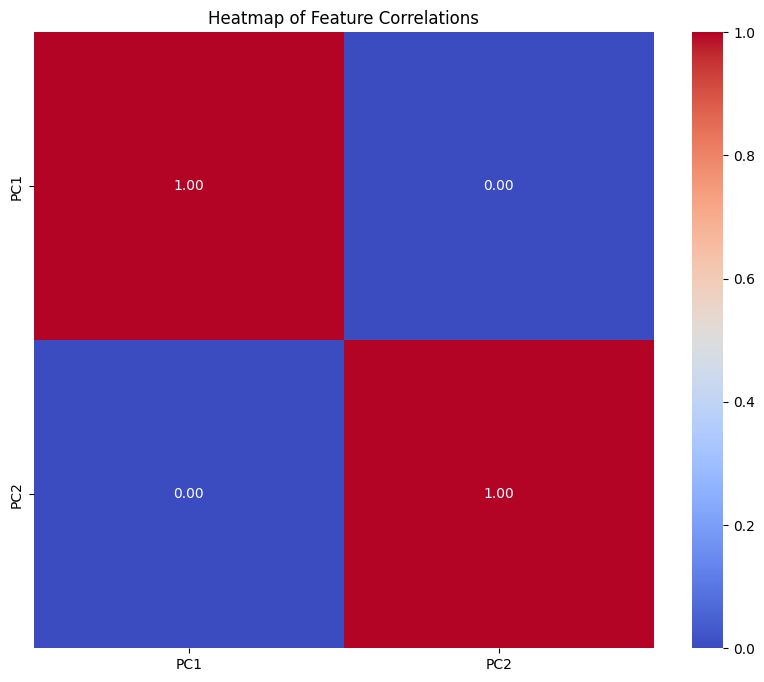

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Feature Correlations")
plt.show()

## Hyperparameter Manual

### Error Plot

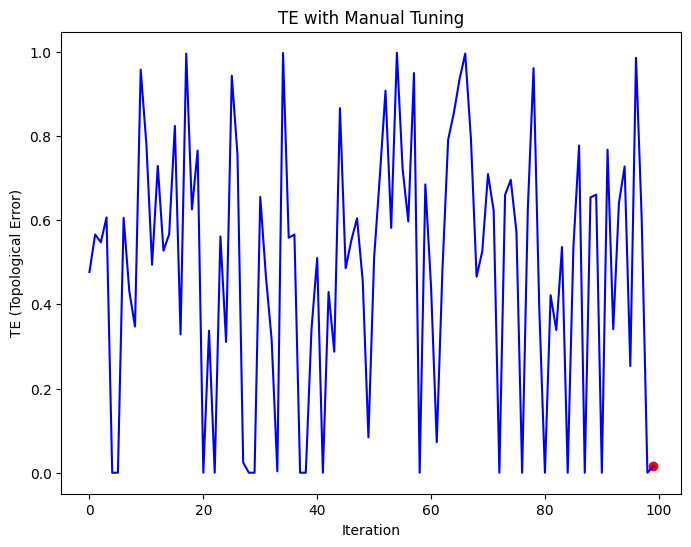

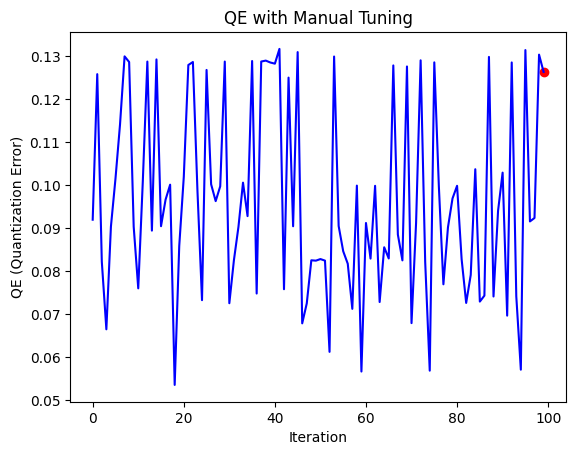

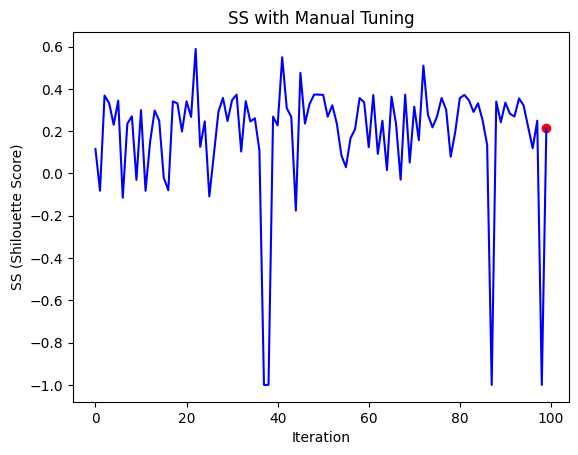

In [38]:
te_values, qe_values, ss_values = zip(*te_qe_ss_manual_plot)
plt.figure(figsize=(8, 6))
plt.plot(te_values, c="blue", label="TE-QE points")
plt.scatter(best_parameter_manual[0],te_values[best_parameter_manual[0]], color="red")
plt.xlabel("Iteration")
plt.ylabel("TE (Topological Error)")
plt.title("TE with Manual Tuning")
plt.show()

plt.plot(qe_values, c="blue", label="TE-QE points")
plt.scatter(best_parameter_manual[0],qe_values[best_parameter_manual[0]], color="red")
plt.xlabel("Iteration")
plt.ylabel("QE (Quantization Error)")
plt.title("QE with Manual Tuning")
plt.show()

plt.plot(ss_values, c="blue", label="SS points")
plt.scatter(best_parameter_manual[0],ss_values[best_parameter_manual[0]], color="red")
plt.xlabel("Iteration")
plt.ylabel("SS (Shilouette Score)")
plt.title("SS with Manual Tuning")
plt.show()

### Weight Plot

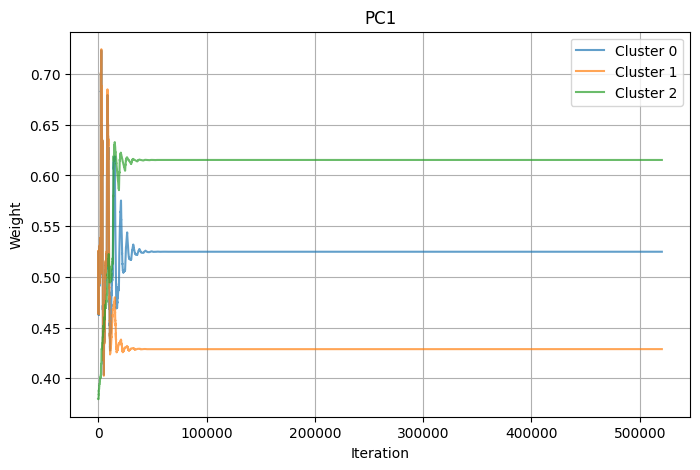

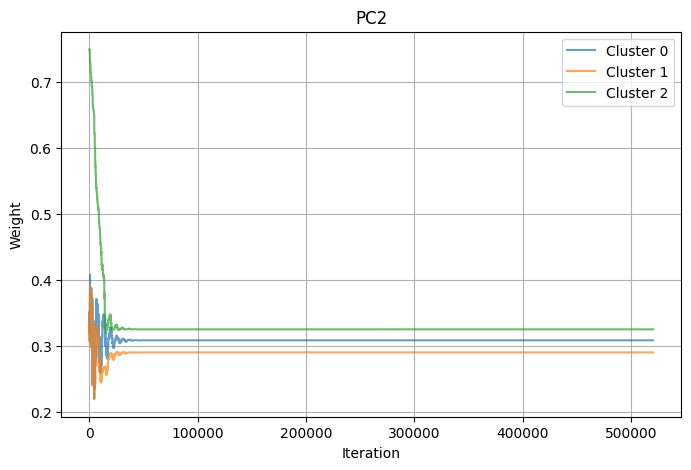

In [ ]:
feature = df.columns.tolist()
w_output = np.array(w_output_manual)

n_features = w_output.shape[-1]
for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        plt.plot(range(w_output.shape[0]), w_output[:, cluster, col], label=f"Cluster {cluster}", alpha=0.7)
    plt.title(f"{feature[col]}")
    plt.xlabel("Iteration")
    plt.ylabel("Weight")
    plt.legend()
    plt.grid()
    plt.show()

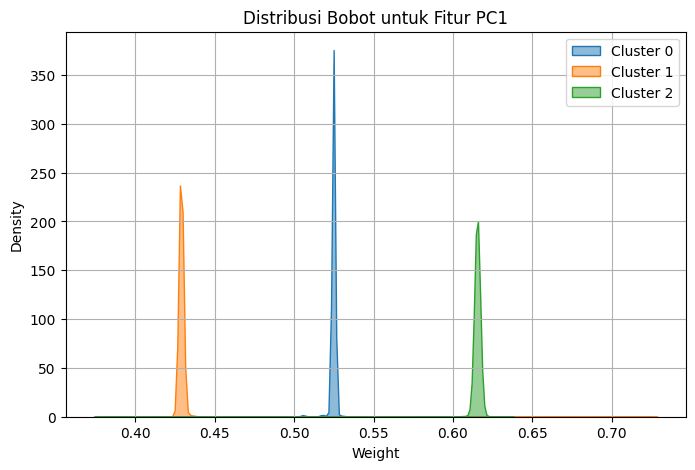

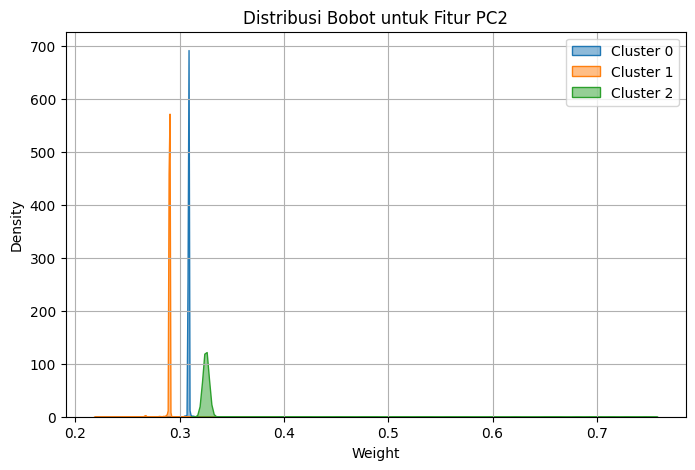

In [40]:
features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        weights = w_output[:, cluster, col]
        sns.kdeplot(weights, label=f"Cluster {cluster}", fill=True, alpha=0.5)

    plt.title(f"Distribusi Bobot untuk Fitur {features[col]}")
    plt.xlabel("Weight")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()


C:\Users\hadik\AppData\Local\Temp\ipykernel_26380\3166627232.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


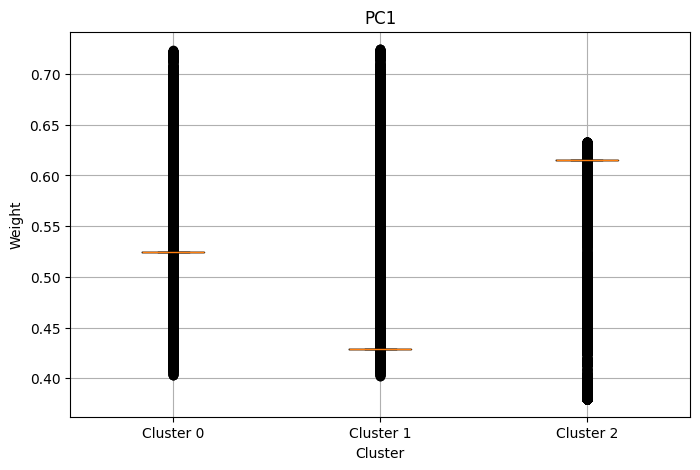

C:\Users\hadik\AppData\Local\Temp\ipykernel_26380\3166627232.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


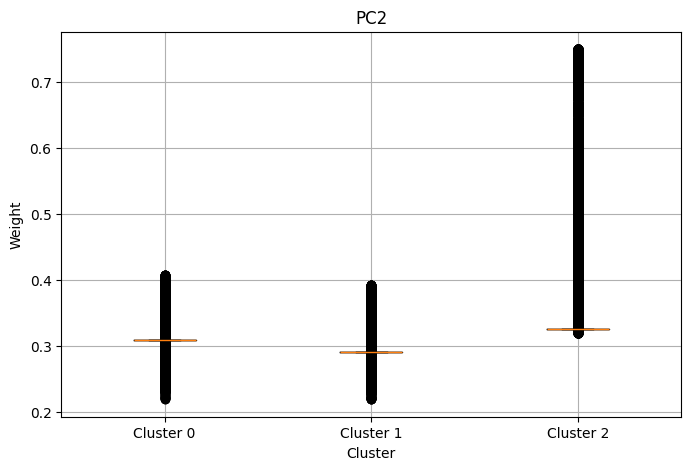

In [41]:
features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    data = [w_output[:, cluster, col] for cluster in range(w_output.shape[1])]
    plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])

    plt.title(f"{features[col]}")
    plt.xlabel("Cluster")
    plt.ylabel("Weight")
    plt.grid()
    plt.show()


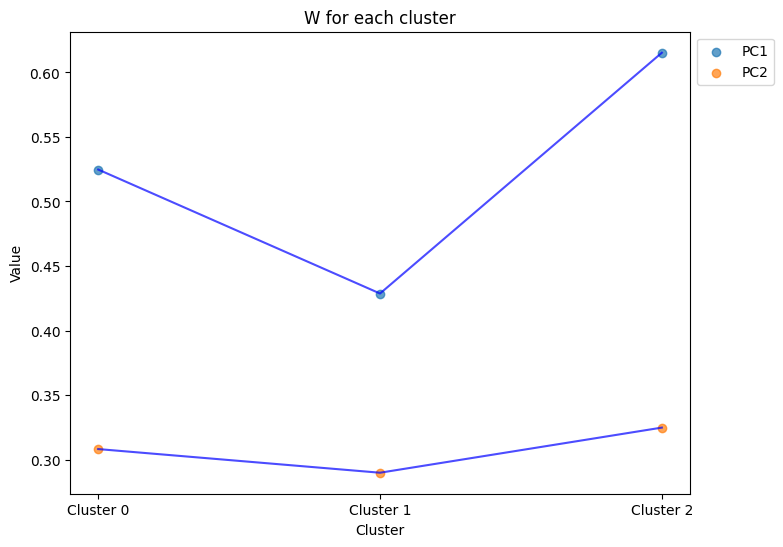

In [42]:
features = df.columns.tolist()

plt.figure(figsize=(8, 6))
for j, feature in enumerate(features):

    data = [w_manual[i][j] for i in range(len(w_manual))]
    
    plt.scatter(range(len(data)), data, alpha=0.7, label=feature)
    plt.plot(range(len(data)), data, color='b', alpha=0.7, label="_nolegend_")
plt.title(f"W for each cluster")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.xticks(range(len(w_manual)), [f"Cluster {i}" for i in range(len(w_manual))])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Clustering Plot

C:\Users\hadik\AppData\Local\Temp\ipykernel_26380\3621496219.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))


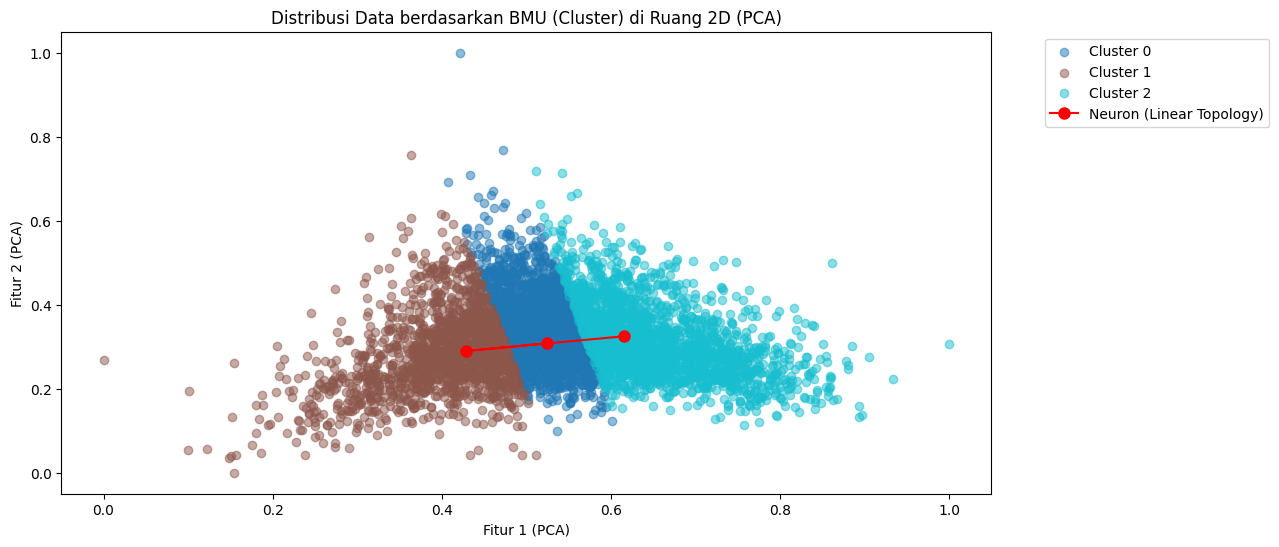

In [43]:
closest_neighbors = np.array(closest_neighbors_manual)

plt.figure(figsize=(12, 6))

unique_bmu_indices_pca = np.unique(closest_neighbors)
unique_bmu_indices_pca = unique_bmu_indices_pca.argsort()
colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))

for i, bmu in enumerate(unique_bmu_indices_pca):
    cluster_data_pca = train[closest_neighbors == bmu]
    plt.scatter(cluster_data_pca[:, 0], cluster_data_pca[:, 1], label=f'Cluster {bmu}', color=colors(i), alpha=0.5)

plt.plot(w_manual[:, 0], w_manual[:, 1], 'r-o', label="Neuron (Linear Topology)", markersize=8)

plt.title("Distribusi Data berdasarkan BMU (Cluster) di Ruang 2D (PCA)")
plt.xlabel("Fitur 1 (PCA)")
plt.ylabel("Fitur 2 (PCA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Hyperparameter Optuna

### Error Plot

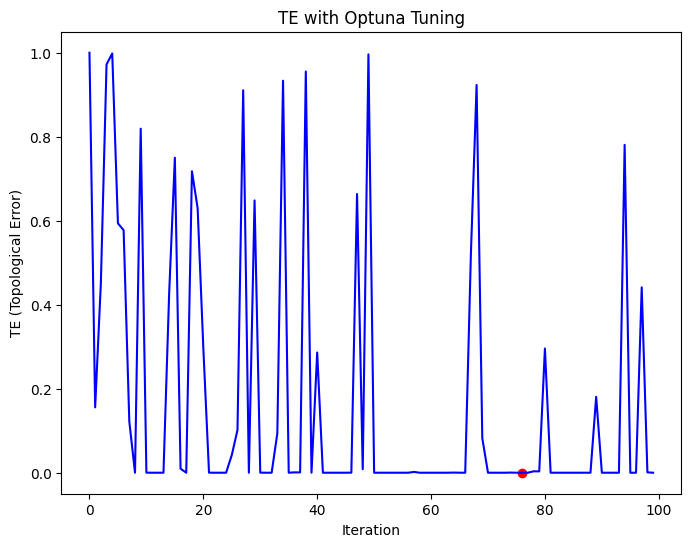

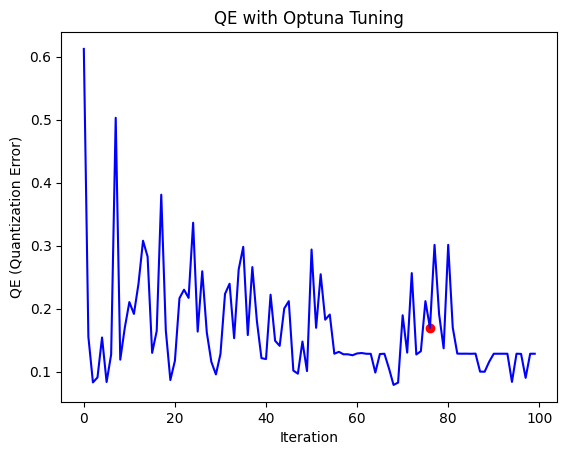

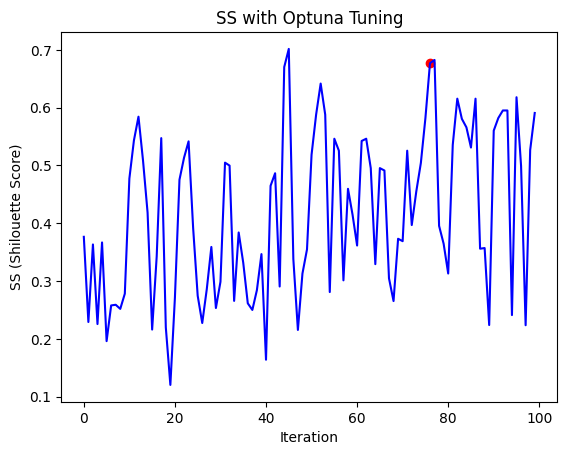

In [44]:
te_values, qe_values, ss_values = zip(*te_qe_ss_optuna_plot)
plt.figure(figsize=(8, 6))
plt.plot(te_values, c="blue", label="TE-QE points")
plt.scatter(study.best_trial.number,te_values[study.best_trial.number], color="red")
plt.xlabel("Iteration")
plt.ylabel("TE (Topological Error)")
plt.title("TE with Optuna Tuning")
plt.show()

plt.plot(qe_values, c="blue", label="TE-QE points")
plt.scatter(study.best_trial.number,qe_values[study.best_trial.number], color="red")
plt.xlabel("Iteration")
plt.ylabel("QE (Quantization Error)")
plt.title("QE with Optuna Tuning")
plt.show()

plt.plot(ss_values, c="blue", label="TE-ss points")
plt.scatter(study.best_trial.number,ss_values[study.best_trial.number], color="red")
plt.xlabel("Iteration")
plt.ylabel("SS (Shilouette Score)")
plt.title("SS with Optuna Tuning")
plt.show()

### Weight Plot

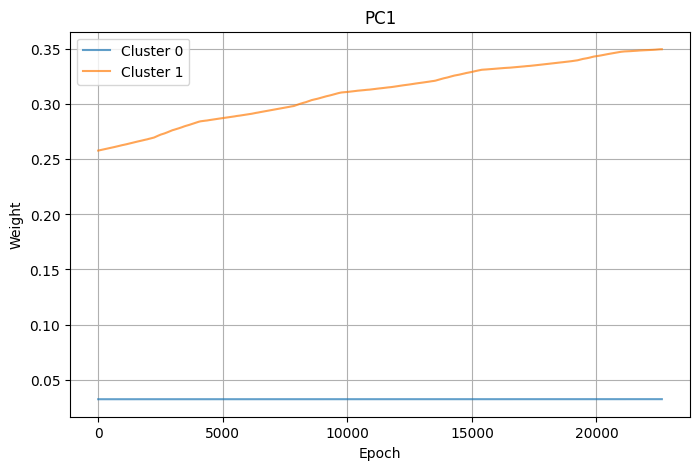

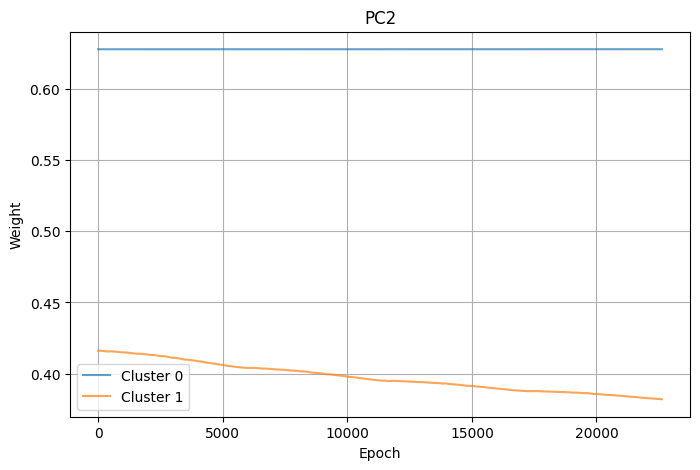

In [45]:
feature = df.columns.tolist()
w_output = np.array(w_output_optuna)

n_features = w_output.shape[-1]
for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        plt.plot(range(w_output.shape[0]), w_output[:, cluster, col], label=f"Cluster {cluster}", alpha=0.7)
    # Use feature[col] for the title
    plt.title(f"{feature[col]}")
    plt.xlabel("Epoch")
    plt.ylabel("Weight")
    plt.legend()
    plt.grid()
    plt.show()

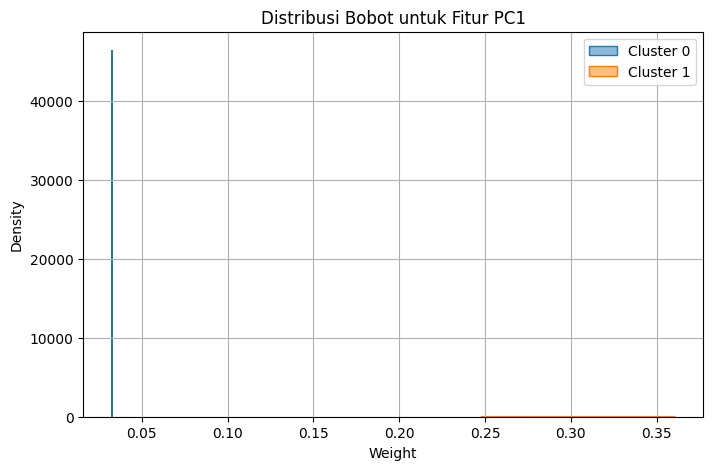

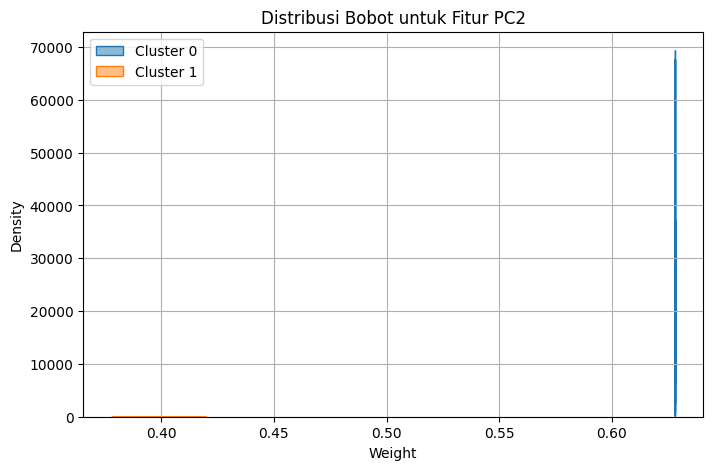

In [46]:
features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        weights = w_output[:, cluster, col]
        sns.kdeplot(weights, label=f"Cluster {cluster}", fill=True, alpha=0.5)

    plt.title(f"Distribusi Bobot untuk Fitur {features[col]}")
    plt.xlabel("Weight")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()


C:\Users\hadik\AppData\Local\Temp\ipykernel_26380\3166627232.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


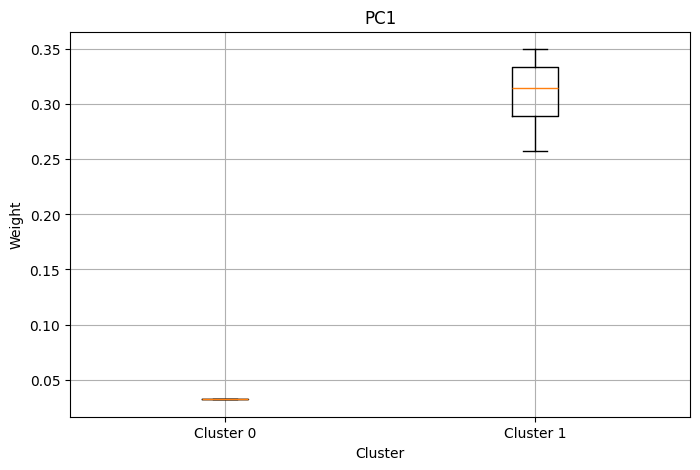

C:\Users\hadik\AppData\Local\Temp\ipykernel_26380\3166627232.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


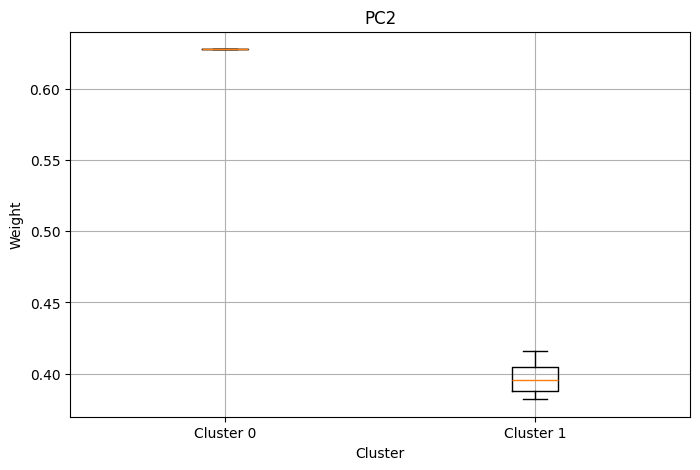

In [47]:
features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    data = [w_output[:, cluster, col] for cluster in range(w_output.shape[1])]
    plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])

    plt.title(f"{features[col]}")
    plt.xlabel("Cluster")
    plt.ylabel("Weight")
    plt.grid()
    plt.show()


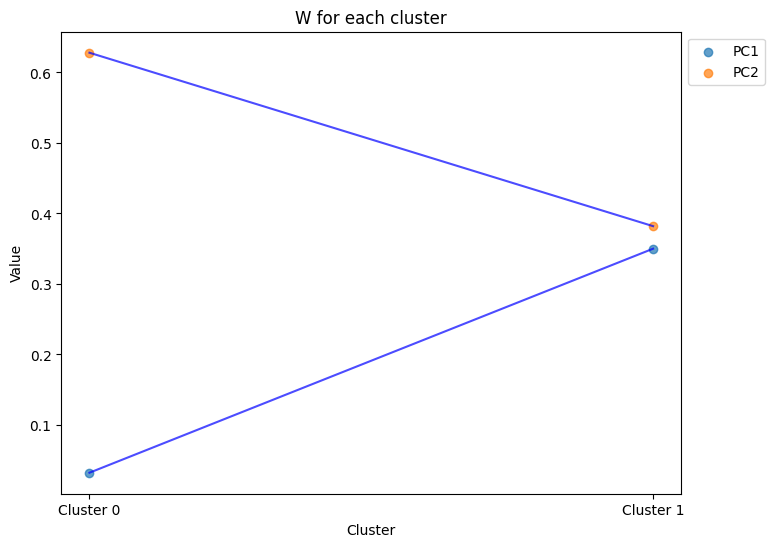

In [48]:
features = df.columns.tolist()

plt.figure(figsize=(8, 6))
for j, feature in enumerate(features):

    data = [w_optuna[i][j] for i in range(len(w_optuna))]
    
    plt.scatter(range(len(data)), data, alpha=0.7, label=feature)
    plt.plot(range(len(data)), data, color='b', alpha=0.7, label="_nolegend_")
plt.title(f"W for each cluster")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.xticks(range(len(w_optuna)), [f"Cluster {i}" for i in range(len(w_optuna))])  # Menampilkan cluster 0, 1, 2, 3 pada sumbu x
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Clustering Plot

C:\Users\hadik\AppData\Local\Temp\ipykernel_26380\1695232180.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))


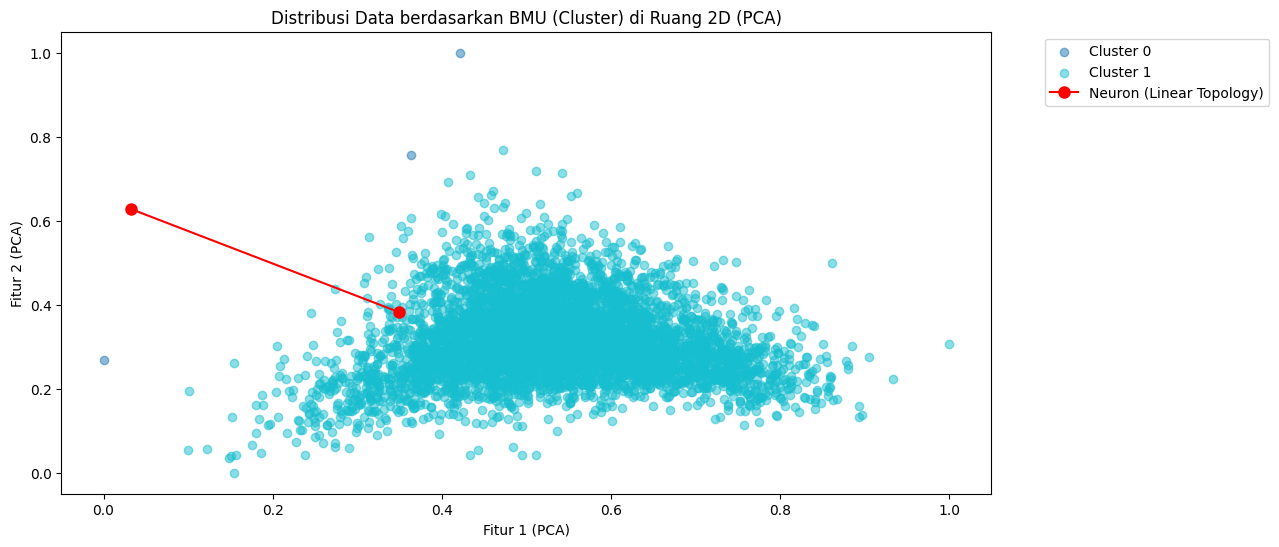

In [49]:

closest_neighbors = np.array(closest_neighbors_optuna)

plt.figure(figsize=(12, 6))

unique_bmu_indices_pca = np.unique(closest_neighbors)
unique_bmu_indices_pca = unique_bmu_indices_pca.argsort()
colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))

for i, bmu in enumerate(unique_bmu_indices_pca):
    cluster_data_pca = train[closest_neighbors == bmu]
    plt.scatter(cluster_data_pca[:, 0], cluster_data_pca[:, 1], label=f'Cluster {bmu}', color=colors(i), alpha=0.5)

plt.plot(w_optuna[:, 0], w_optuna[:, 1], 'r-o', label="Neuron (Linear Topology)", markersize=8)

plt.title("Distribusi Data berdasarkan BMU (Cluster) di Ruang 2D (PCA)")
plt.xlabel("Fitur 1 (PCA)")
plt.ylabel("Fitur 2 (PCA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()